<a href="https://colab.research.google.com/github/serrve1/ubion_project1/blob/main/Gaussian_final(version_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# # # 한글 폰트 설정 => 런타임 다시 시작 후 실행
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# !pip install html_table_parser# 한글 나눔 폰트

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

<a href="https://colab.research.google.com/github/amazon4b/Learning-Machine/blob/learner1/%EA%B2%BD%EA%B8%B0%EB%B6%84%EC%84%9D%2Ck_means(k%3D4)%2Cmeanshift%2C_minmax%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

# 경고 메시지를 출력하지 않도록 설정
warnings.filterwarnings("ignore")

# 경고 메시지를 발생시키는 함수
def example_function():
    warnings.warn("이 함수는 예제일 뿐입니다.", UserWarning)

# 함수 호출
example_function()

In [2]:
# 기본패키지 설치
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans # 케이민즈 알고리즘
from sklearn.preprocessing import StandardScaler# 스텐다드 스케일러
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc

In [3]:
# 데이터프레임 불러오기
economics = pd.read_csv('/content/drive/MyDrive/프로젝트1/dataset/resampled_data_final.csv',encoding="euc-kr")
economics['DATE'] = pd.to_datetime(economics['DATE'])
economics['DATE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 289 entries, 0 to 288
Series name: DATE
Non-Null Count  Dtype         
--------------  -----         
287 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.4 KB


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# 상관계수가 높은 피쳐 제거
economics.drop(['장단기10년물국채/3개월금리차','신규실업수당청구','금융상태지수레버리지','제조업신규주문'],axis=1,inplace=True)

In [6]:
economics[economics.isna().any(axis=1)] # 결측치 확인

,DATE,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,M2통화량,경기동행종합,산업생산지수,소매판매
287,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
economics = economics.iloc[:287 , ] # 결측치 제거
economics[economics.isna().any(axis=1)] # 결측치 확인

,DATE,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,M2통화량,경기동행종합,산업생산지수,소매판매


In [8]:
# 2000년~2019년만 군집화하기 위함 , 코로나 데이터가 이상치로 잡히기 때문에 군집이 제대로 형성되지 않음
economics = economics.loc[economics['DATE'].dt.year <=2019 ]

In [9]:
# 주택가격지수. 제조업신규주문 , 경기동행종합지수는 차분하고 (변동치로 변경한다는 뜻)
# 제조업 신규주문은 앞으로 어떻게 처리할지 일단 보류
#M2와 소매판매는 변화율로 바꾸는 전처리 시행
economics.주택가격지수 = economics.주택가격지수.diff().fillna(method= 'bfill')
economics.경기동행종합 = economics.경기동행종합.diff().fillna(method= 'bfill')
economics['M2차분'] = economics.M2통화량.diff().fillna(method= 'bfill')
economics['M2변화율'] = economics.M2차분/ (economics.M2통화량.shift(1)) * 100
#economics['M2변화율'] .fillna(method = 'ffill')
economics['소매판매차분'] = economics.소매판매.diff().fillna(method='bfill')
economics['소매판매변화율'] = economics.소매판매차분/ (economics.소매판매.shift(1)) * 100


# 차분, 변화율 확인
economics[['M2통화량','M2차분','M2변화율','소매판매','소매판매차분','소매판매변화율']].head(10)
# 결측치를 다음날 데이터로 채워주기
economics['M2변화율'] = economics['M2변화율'].fillna(method = 'bfill')
economics['소매판매변화율'] = economics['소매판매변화율'].fillna(method = 'bfill')
# M2, 소매판매 원데이터를 지웠습니다.
economics.drop(['M2통화량','M2차분','소매판매','소매판매차분'],axis = 1,inplace = True)

In [10]:
# 다시 날짜를 인덱스로 설정해주기
economics = economics.set_index('DATE')

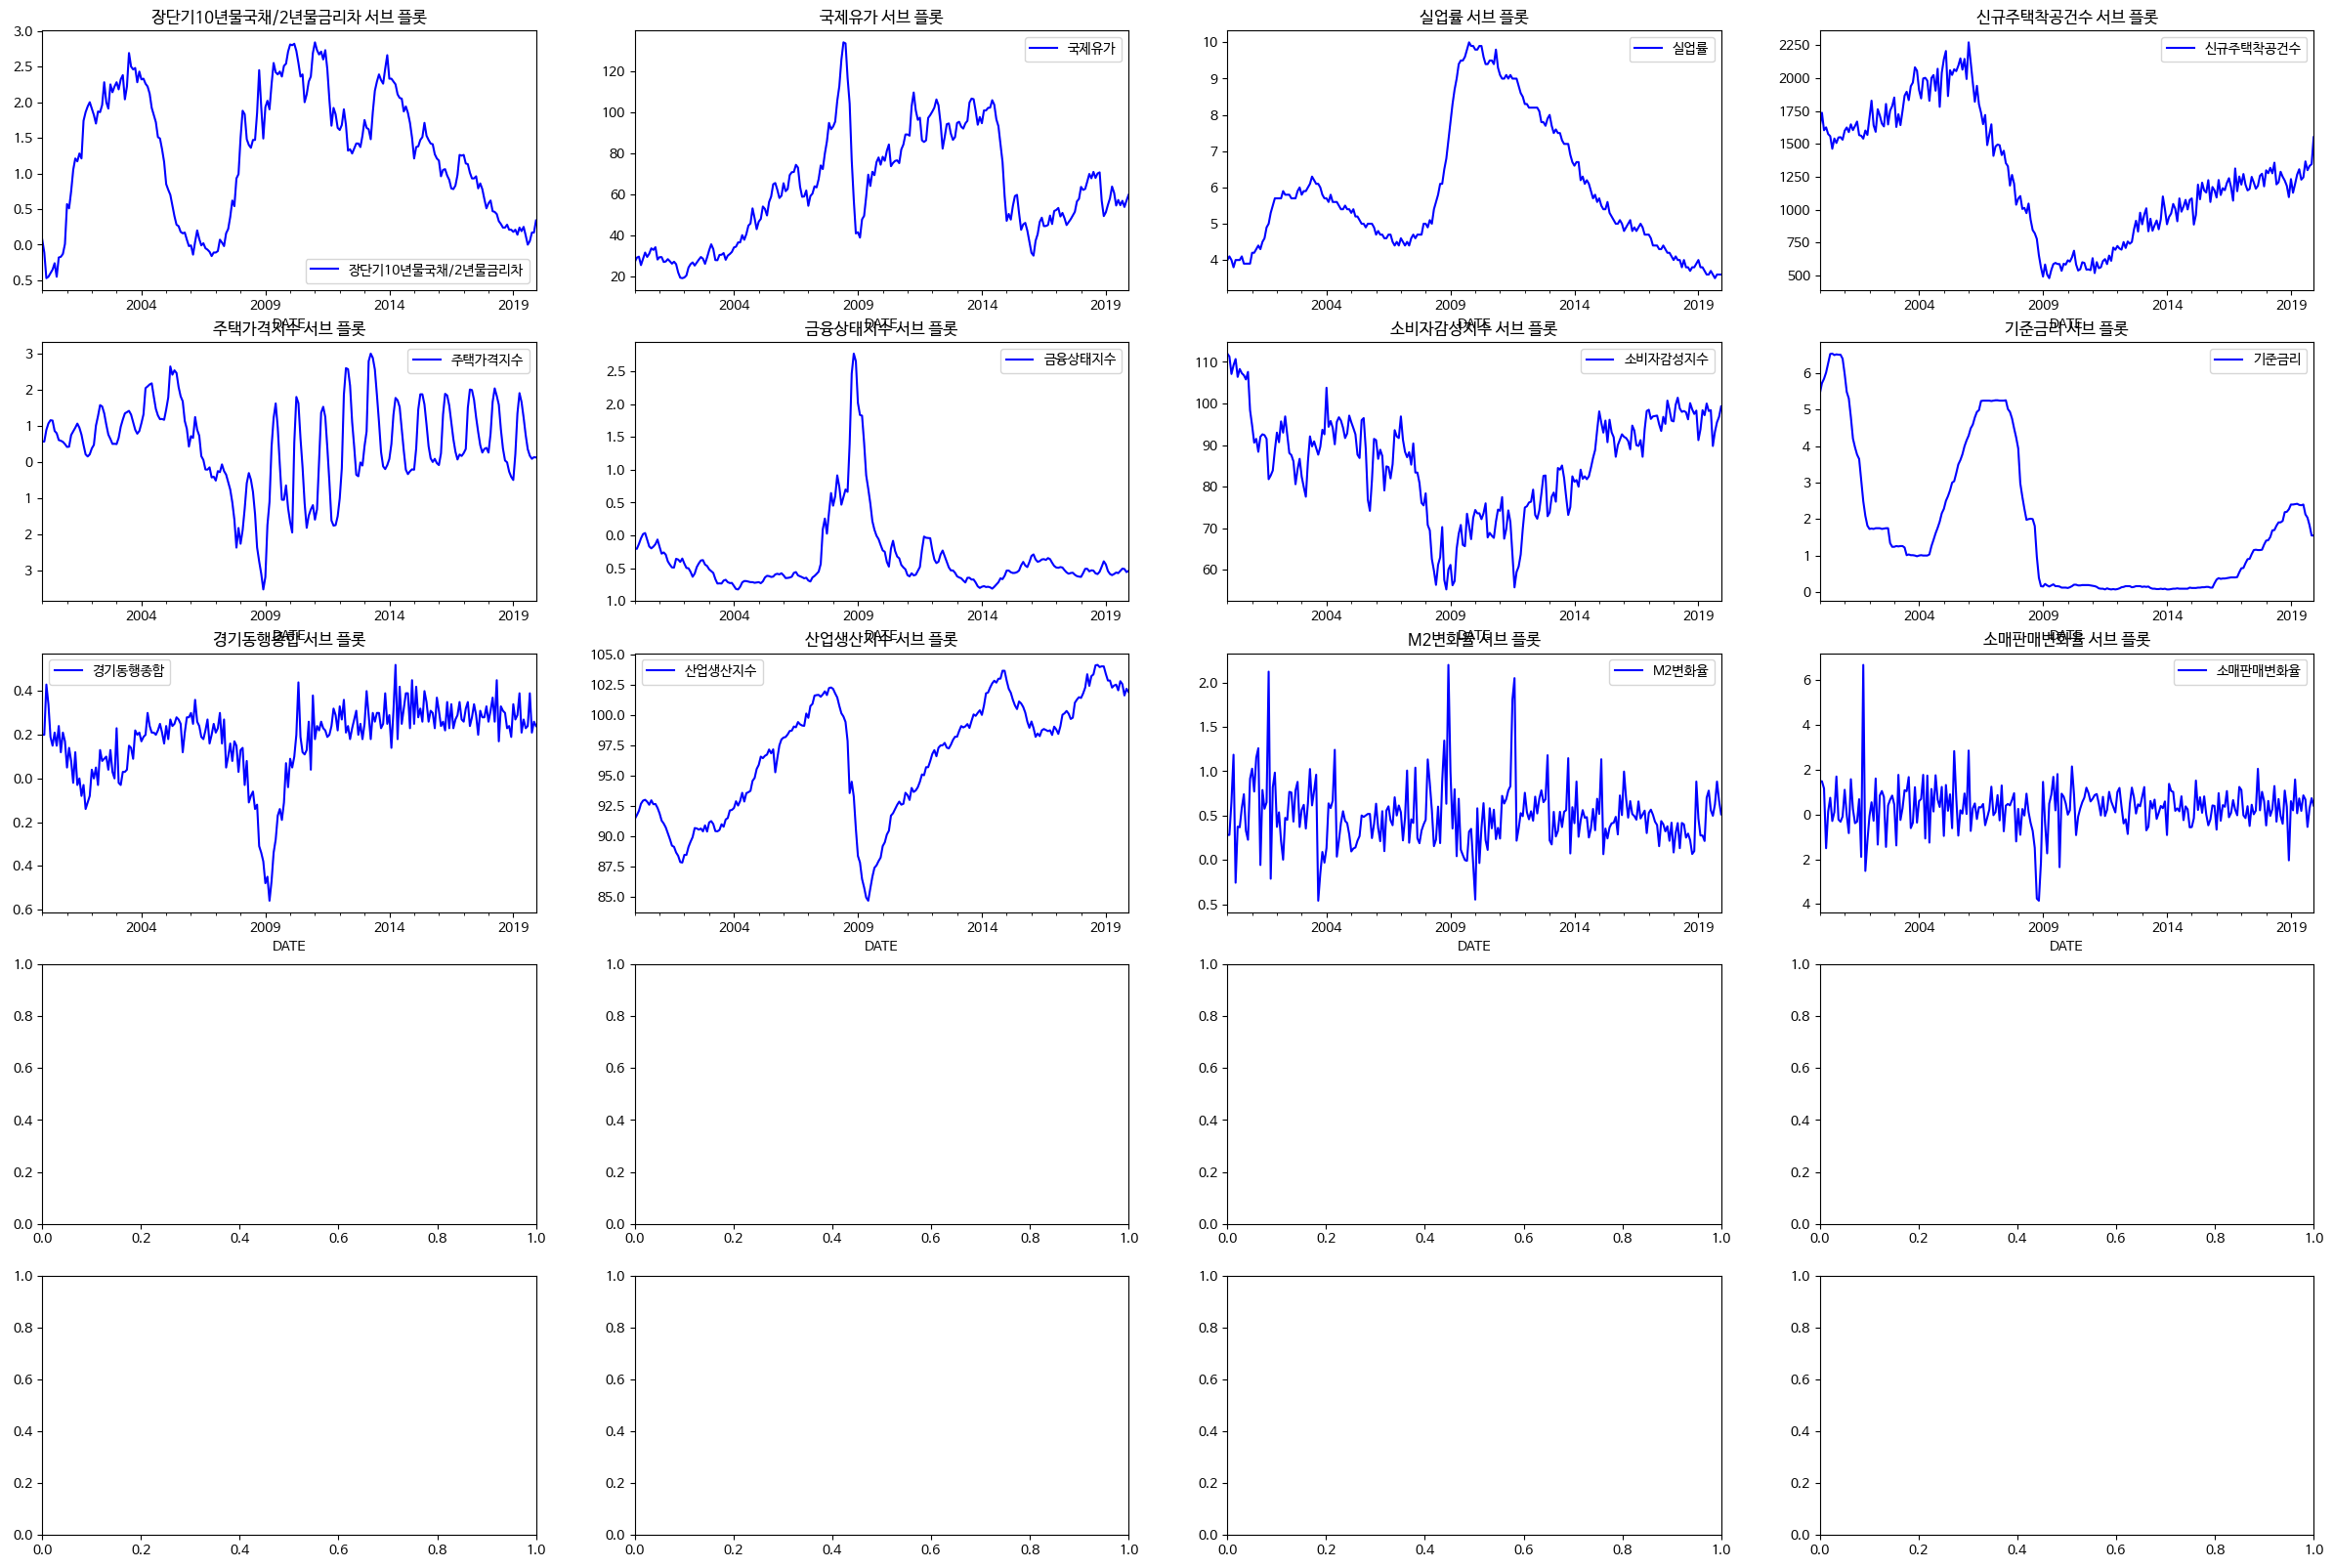

In [11]:
# 그래프 크기 조정
#plt.rcParams['font.family'] ='Malgun Gothic'
plt.rc('font', family='NanumBarunGothic')
가로, 세로 = 30, 20  # 원하는 크기로 조절
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(가로, 세로))  # 3행 4열의 서브 플롯 생성
# 각 컬럼에 대한 서브 플롯 그리기
for i, col in enumerate(economics.columns):
    economics.plot(y= col, kind='line', ax=axs[i//4, i%4], color='blue')
    axs[i//4, i%4].set_title(f'{col} 서브 플롯')

# 그래프 출력
plt.show()

#### 스케일링

In [12]:
# 민멕스 스케일링
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 선언 및 Fitting
mMscaler = MinMaxScaler()
mMscaler.fit(economics)

# 데이터 변환
mMscaled_data = mMscaler.transform(economics)

# 데이터 프레임으로 저장
mMscaled_data = pd.DataFrame(data = mMscaled_data, index = economics.index , columns = economics.columns)

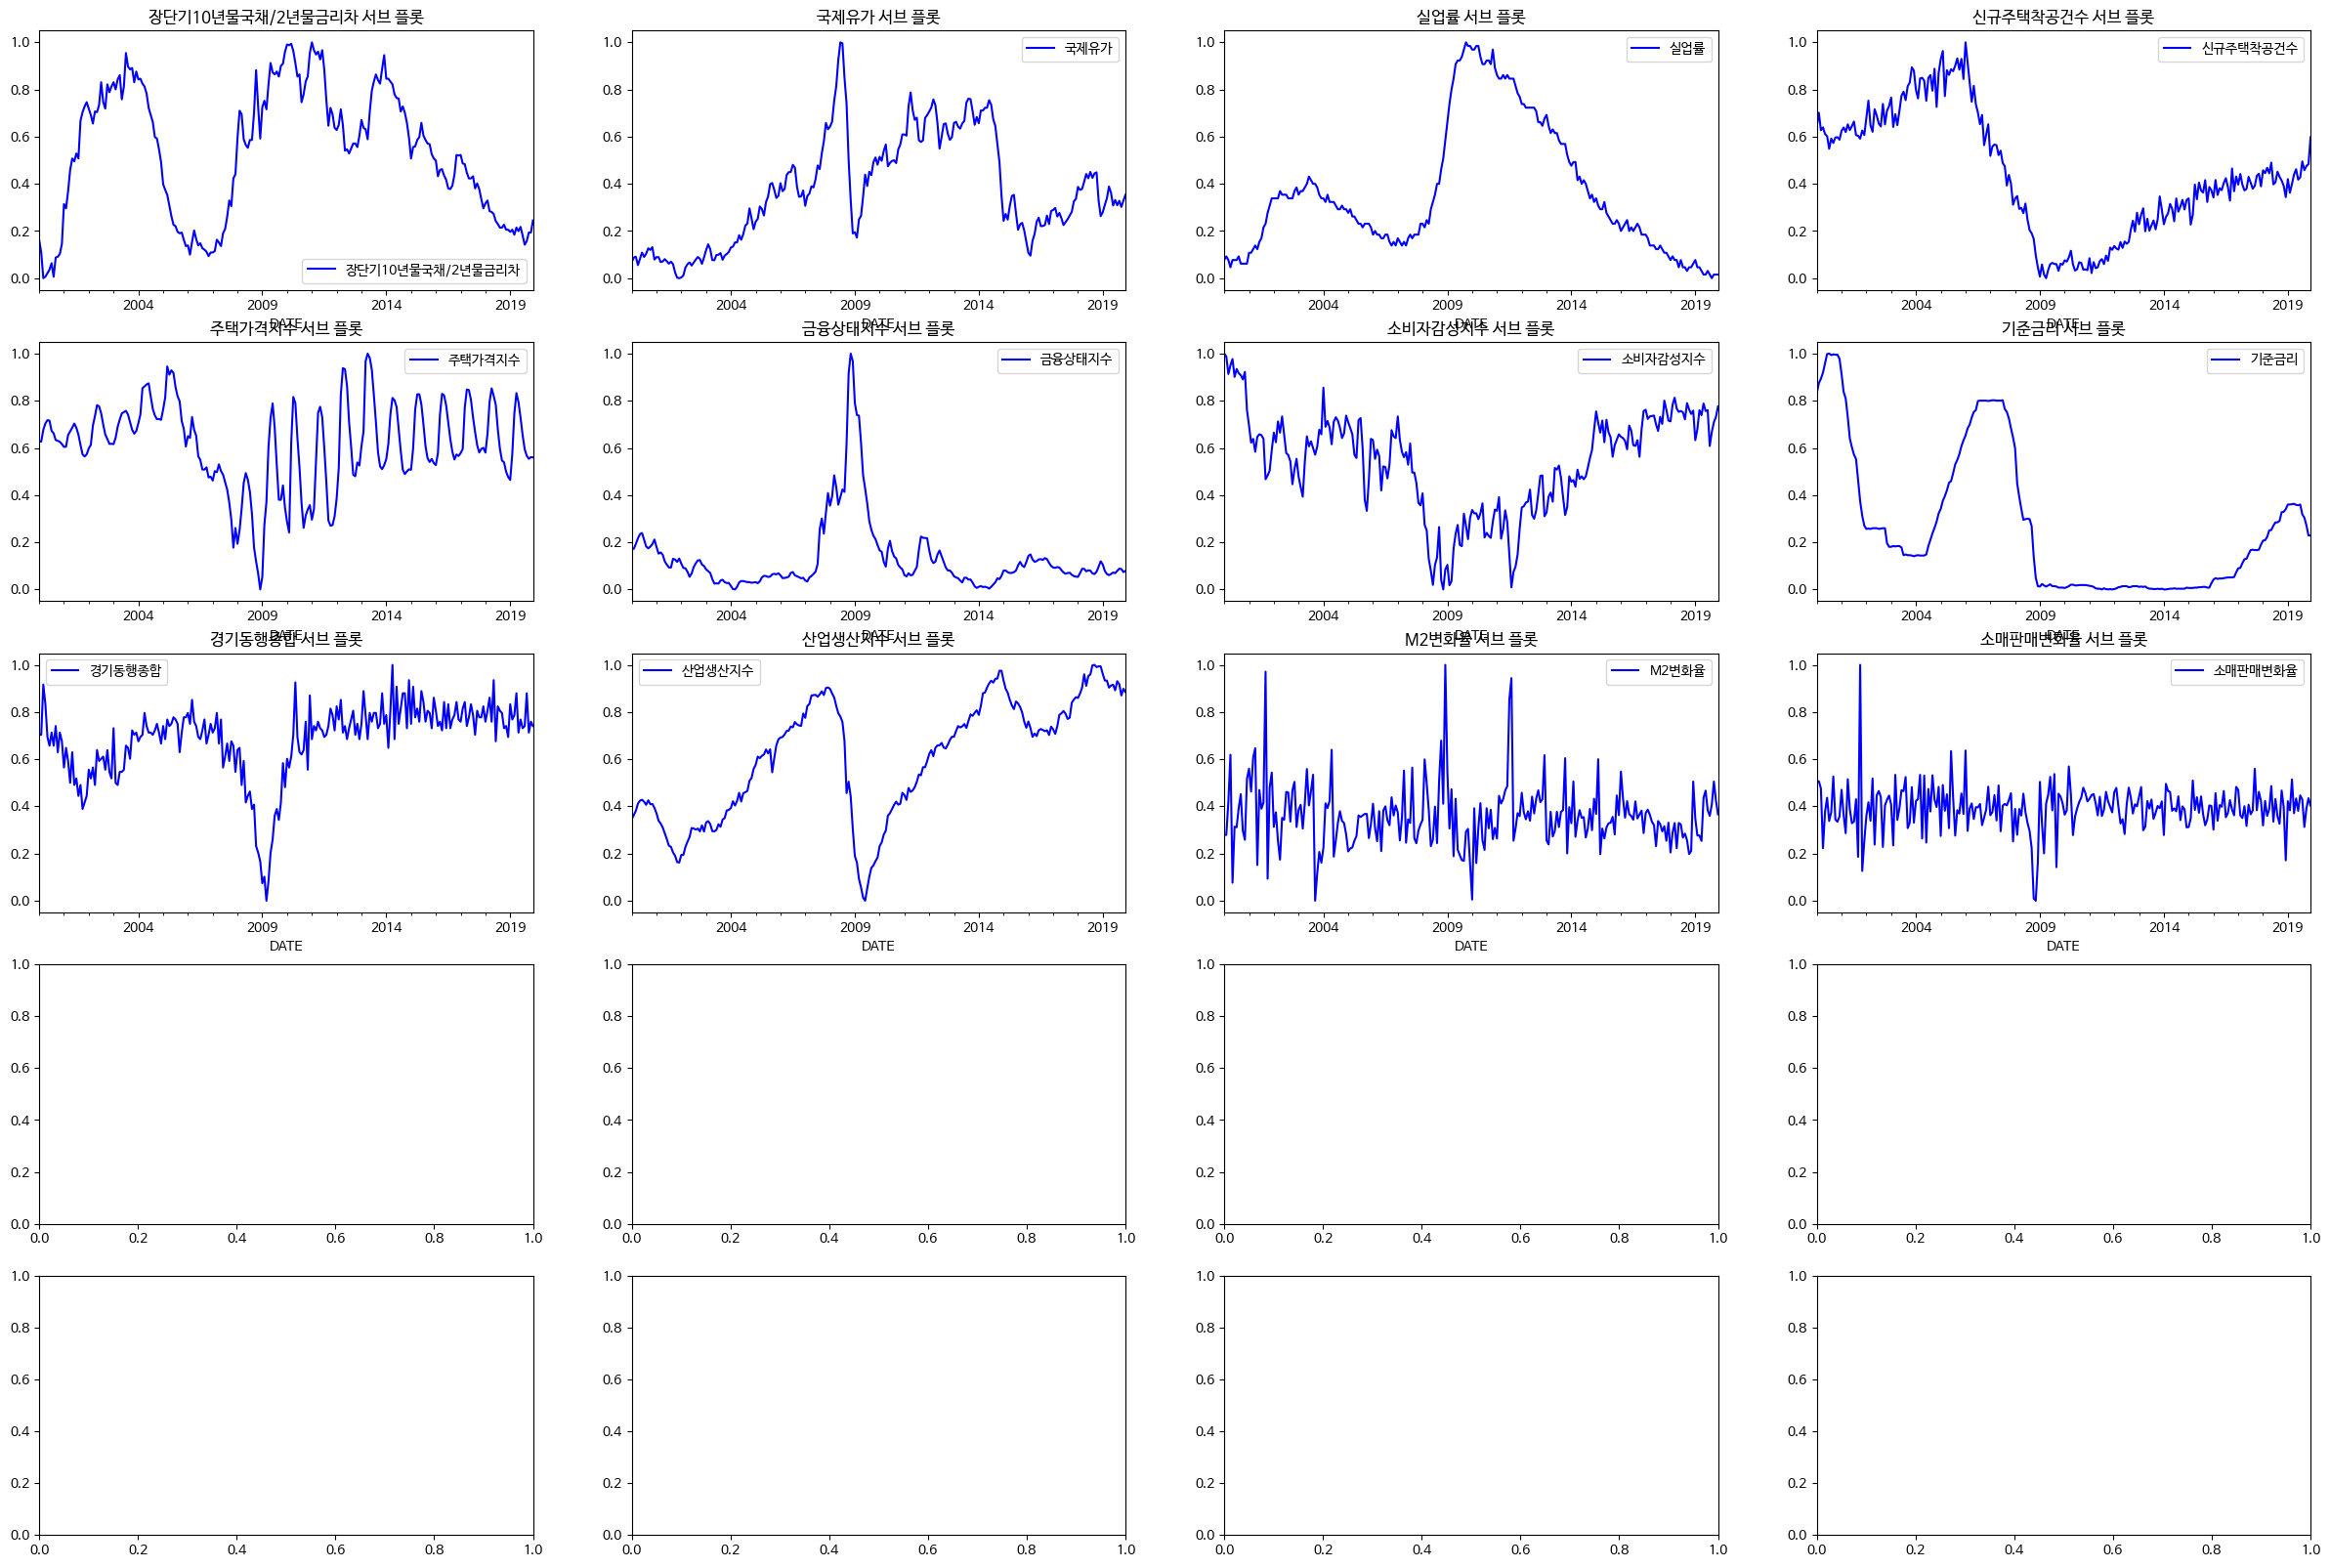

In [13]:
# 민멕스 스케일링한 데이터를 간단하게 시각화 해서 보기
가로, 세로 = 30, 20  # 원하는 크기로 조절
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(가로, 세로))  # 3행 4열의 서브 플롯 생성
plt.rc('font', family='NanumBarunGothic')
# 각 컬럼에 대한 서브 플롯 그리기
for i, col in enumerate(mMscaled_data.columns):
    mMscaled_data.plot(y= col, kind='line', ax=axs[i//4, i%4], color='blue')
    axs[i//4, i%4].set_title(f'{col} 서브 플롯')

# 그래프 출력
plt.show()

#### GaussianMixture 군집화 비교분석

In [14]:
pca_df0 = mMscaled_data.copy()

In [15]:
from sklearn.decomposition import PCA

pca = PCA()

pca_df = pd.DataFrame(pca.fit_transform(pca_df0))

# 주성분들이 설명하는 분산의 비율을 확인
# Access explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Print or use the explained variance ratios
print("Explained Variance Ratios:")
print(explained_variance_ratios)

Explained Variance Ratios:
[0.47486627 0.18528129 0.13890905 0.05980781 0.03945728 0.02936114
 0.02662438 0.01594366 0.01311452 0.00692286 0.00604826 0.00366349]


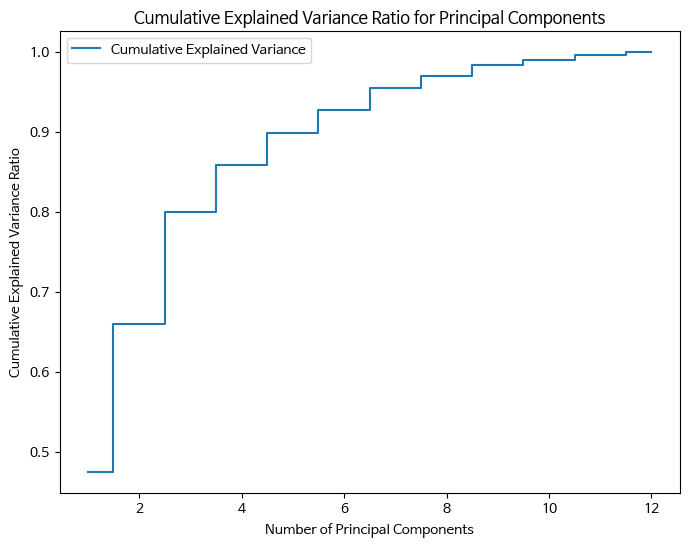

In [16]:
plt.figure(figsize=(8, 6))
plt.rc('font', family='NanumBarunGothic')
plt.step(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio for Principal Components')
plt.legend()
plt.show()

# plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Eigen Values')
# plt.ylabel('Ratio of Variance Explained')
# plt.title('Variance Covered by each Eigen Value')
# plt.show()

In [17]:
# components 5개로 설정
pca_df = pca_df.drop(columns = [5,6,7,8,9,10,11])
pca_df.head()

,0,1,2,3,4
0,-0.822012,0.369716,0.161866,-0.054982,-0.302402
1,-0.873760,0.363113,0.193319,-0.104235,-0.280930
2,-0.909069,0.247894,0.217418,-0.114760,-0.329716
3,-0.949386,0.282315,0.267522,0.006774,-0.246777
4,-0.934304,0.294915,0.259300,-0.130338,-0.403937


In [18]:
# PCA한 데이터 스케일링
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 선언 및 Fitting
mMscaler = MinMaxScaler()
mMscaler.fit(pca_df)

# 데이터 변환
scaled_pca = mMscaler.transform(pca_df)

# 데이터 프레임으로 저장
scaled_pca = pd.DataFrame(data = scaled_pca, index = pca_df.index , columns = pca_df.columns)

In [19]:
scaled_pca

,0,1,2,3,4
0,0.065668,0.753955,0.475056,0.256606,0.125217
1,0.038989,0.748406,0.497495,0.213235,0.151697
2,0.020786,0.651579,0.514689,0.203968,0.091533
3,0.000000,0.680505,0.550434,0.310986,0.193816
4,0.007775,0.691094,0.544568,0.190250,0.000000
...,...,...,...,...,...
235,0.236399,0.170451,0.397957,0.449650,0.494207
236,0.235087,0.128080,0.378530,0.479030,0.466752
237,0.254693,0.217826,0.385363,0.529593,0.500461
238,0.255461,0.172713,0.342116,0.508544,0.475757


In [20]:
from sklearn.mixture import GaussianMixture
from numpy import unique
from numpy import where

# define the model : n_components=5 (cluster 갯수)
gmm = GaussianMixture(n_components=5, random_state=24)

# train the model
gmm_label = gmm.fit(scaled_pca).predict(scaled_pca)

# assign each data point to a cluster
scaled_pca['gmm_cluster'] = gmm_label

# get all of the unique clusters
gaussian_clusters = unique(scaled_pca['gmm_cluster'])
print(gaussian_clusters)

scaled_pca['gmm_cluster'].value_counts()

[0 1 2 3 4]


2    61
1    56
0    49
3    39
4    35
Name: gmm_cluster, dtype: int64

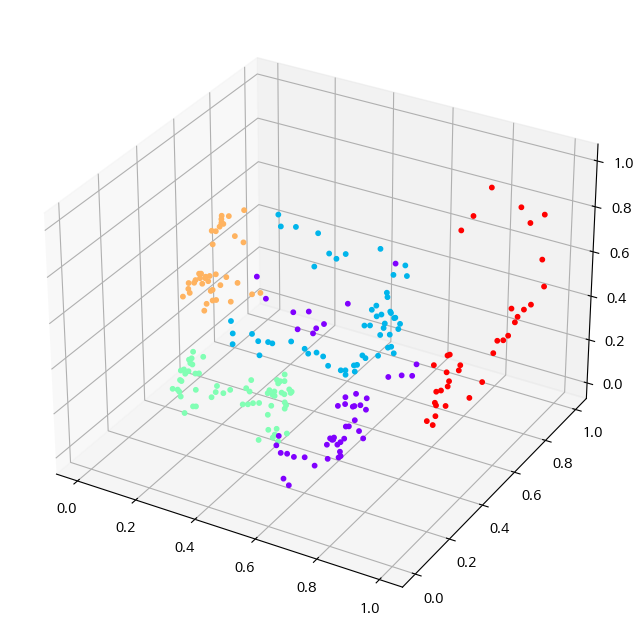

In [21]:
# 3차원으로 시각화하기

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = scaled_pca

# 데이터 scatterplot
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
           , c = X.gmm_cluster
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
          )

# centroid scatterplot
# ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')
plt.show()


In [ ]:
# # 군집화 성능 평가 - 실루엣 점수
# from sklearn import metrics

# silhouette_score = metrics.silhouette_score(X, gmm_label)
# print(f"실루엣 점수: {silhouette_score}")

# # 군집화 성능 평가 - BIC (작을수록 좋음)
# bic_score = gmm.bic(X)
# print(f"BIC (Bayesian Information Criterion): {bic_score}")

# # 군집화 성능 평가 - AIC (작을수록 좋음)
# aic_score = gmm.aic(X)
# print(f"AIC (Akaike Information Criterion): {aic_score}")

In [ ]:
# 실루엣 점수가 어느 정도 높고, BIC와 AIC가 음수에 가까운 작은 값을 가진다면, GMM 모델이 데이터에 잘 적합되어 군집화가 어느 정도 성공적으로 수행되었다고 판단

In [23]:
# SAHM 데이터 불러오기 및 cluster 컬럼 추가
SAHM = pd.read_csv('/content/drive/MyDrive/프로젝트1/dataset/SAHMREALTIME.csv')
scaled_pca.reset_index(inplace=True)
SAHM['cluster'] = scaled_pca['gmm_cluster']

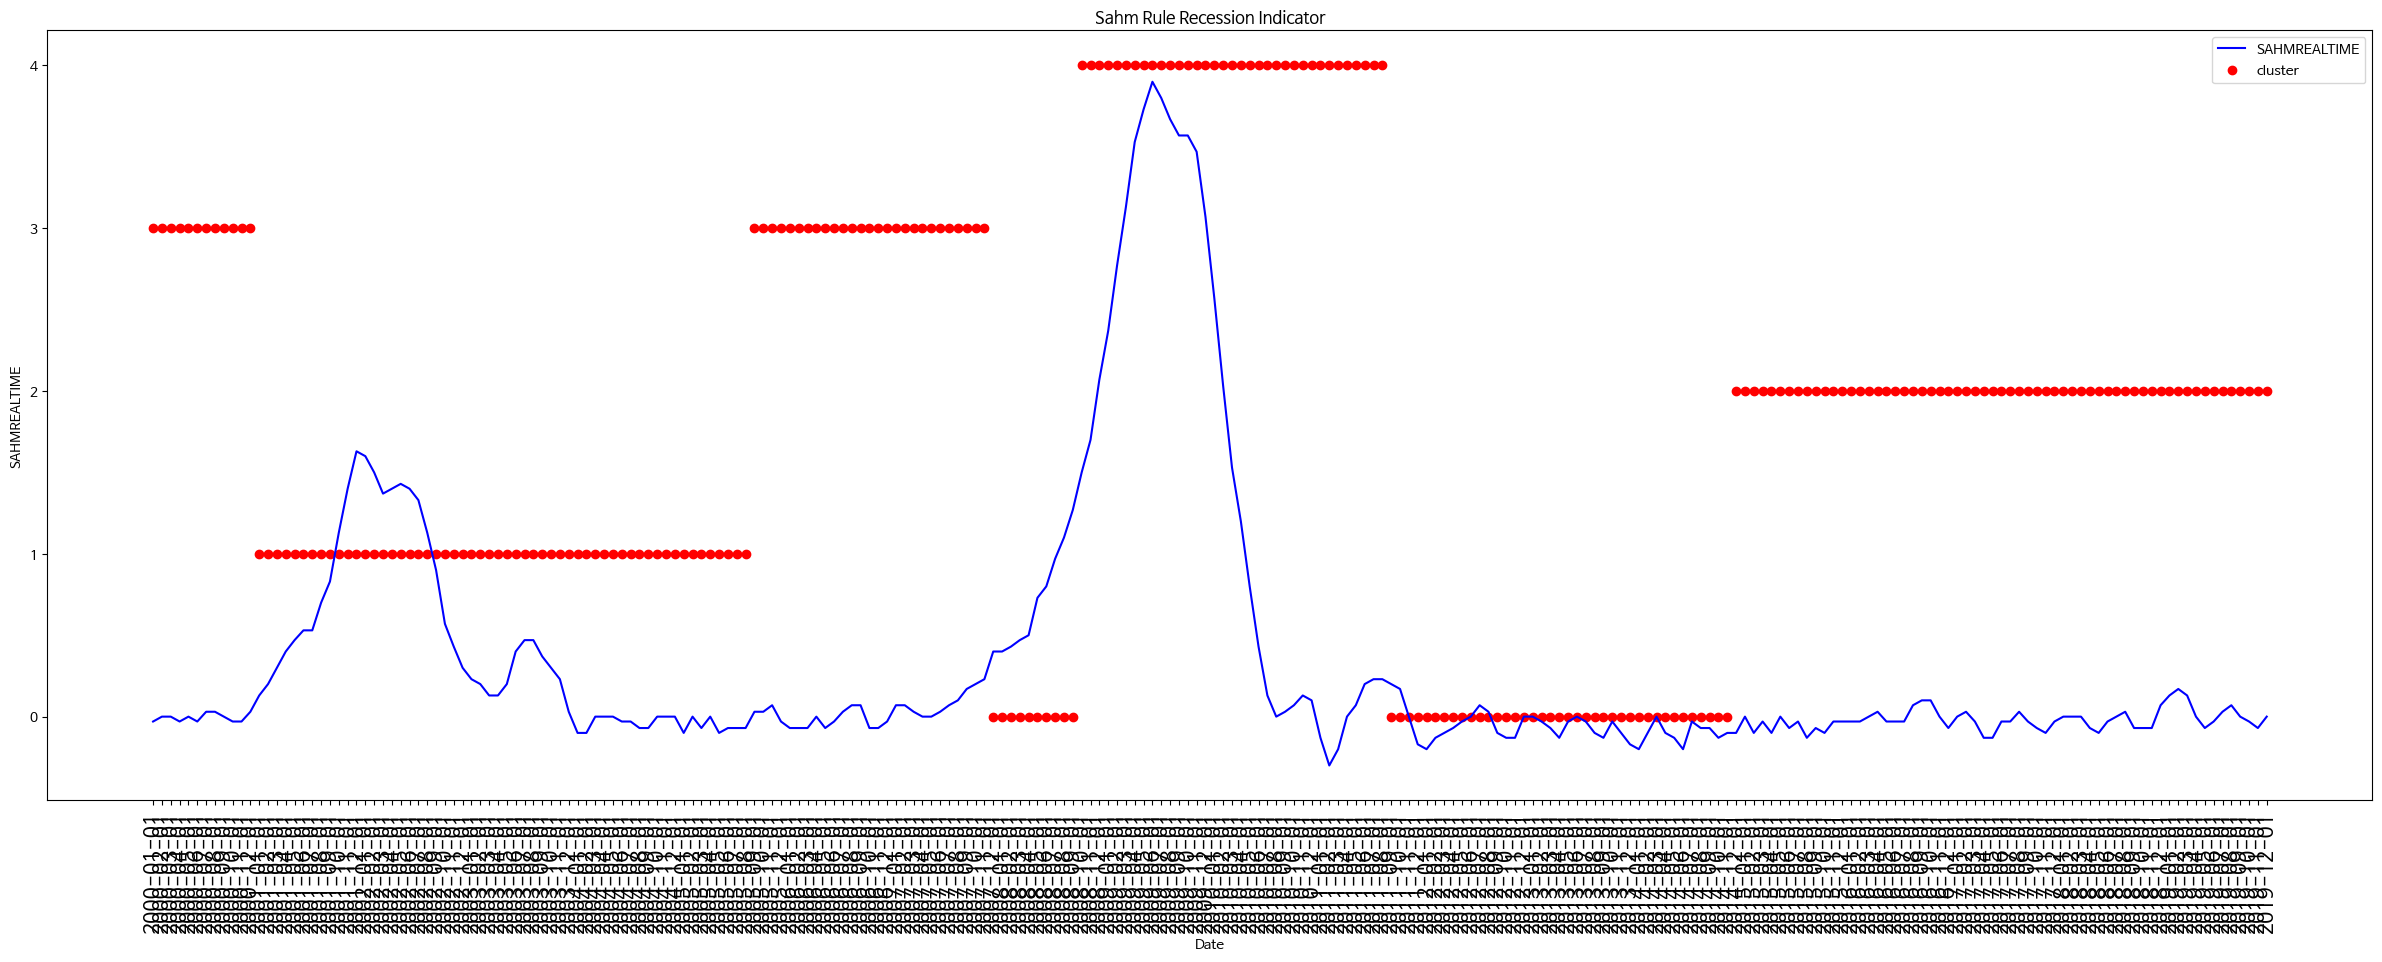

In [25]:
# SAHM지수와 클러스터 비교
plt.figure(figsize=(30, 10))

plt.plot(SAHM.DATE, SAHM['SAHMREALTIME'], label='SAHMREALTIME', color='blue')
plt.scatter(SAHM.DATE, SAHM['cluster'], label='cluster', color='red')

plt.title('Sahm Rule Recession Indicator')
plt.xlabel('Date')
plt.ylabel('SAHMREALTIME')
plt.xticks(rotation='vertical', fontsize=15)
plt.legend()
plt.show()

In [34]:
# pca_df 인덱스 재설정 및 필요없는 컬럼 삭제
scaled_pca.set_index('index',inplace=True)

KeyError: "None of ['index'] are in the columns"

In [39]:
# gdp 데이터 불러오기 및 cluster 컬럼 추가
gdp = pd.read_csv('/content/drive/MyDrive/프로젝트1/gdp.csv')
gdp['cluster'] = scaled_pca['gmm_cluster']

In [42]:
gdp

,Unnamed: 0,USAGDPRQPSMEI,cluster
0,2000-01-31,4.224745,3
1,2000-02-29,4.224745,3
2,2000-03-31,4.224745,3
3,2000-04-30,5.244457,3
4,2000-05-31,5.244457,3
...,...,...,...
235,2019-08-31,2.670265,2
236,2019-09-30,2.670265,2
237,2019-10-31,3.182556,2
238,2019-11-30,3.182556,2


In [43]:
gdp = gdp.rename(columns={'Unnamed: 0': 'DATE'})
gdp.set_index('DATE',inplace=True)

In [44]:
gdp.head()

,USAGDPRQPSMEI,cluster
DATE,,
2000-01-31,4.224745,3
2000-02-29,4.224745,3
2000-03-31,4.224745,3
2000-04-30,5.244457,3
2000-05-31,5.244457,3


In [45]:
gdp['cluster'].value_counts()

2    61
1    56
0    49
3    39
4    35
Name: cluster, dtype: int64

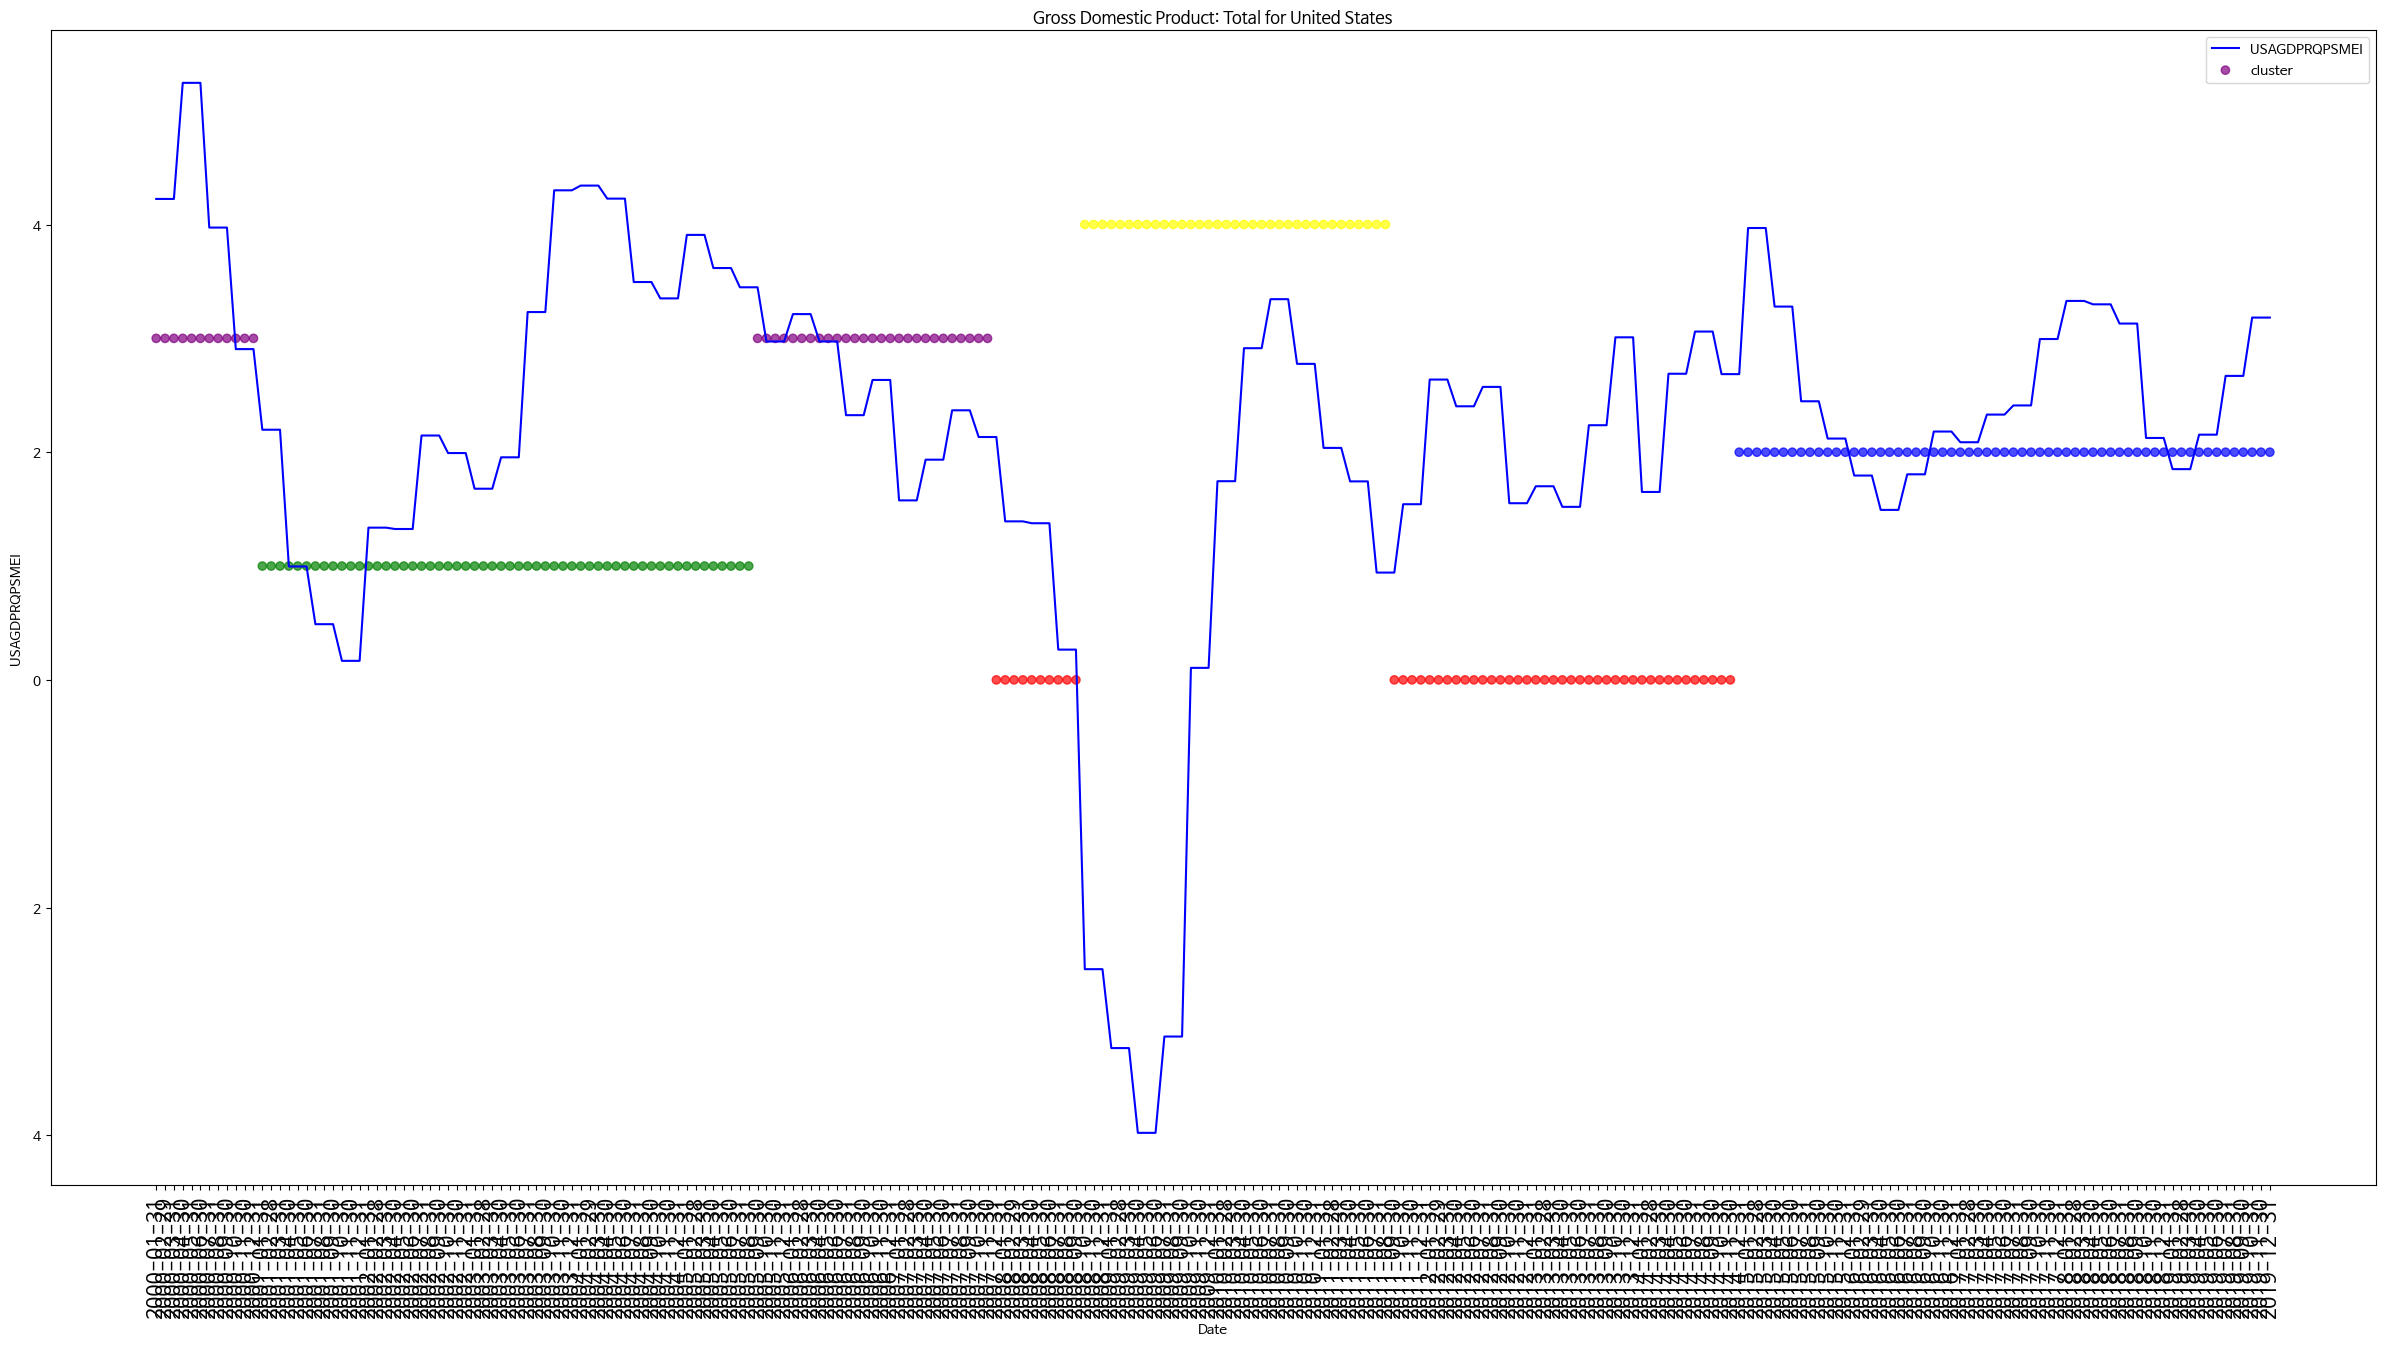

In [46]:
# GDP와 클러스터 비교
import seaborn as sns

# 각 클러스터에 대한 색상을 정의합니다.
cluster_colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'purple', 4: 'yellow'}  # 클러스터의 수에 따라 조정

# 각 데이터 포인트에 대한 색상을 설정합니다.
colors = [cluster_colors[cluster] for cluster in gdp['cluster']]

# 그래프를 그립니다.
plt.figure(figsize=(30, 15))

plt.plot(gdp.index, gdp['USAGDPRQPSMEI'], label='USAGDPRQPSMEI', color='blue')
plt.scatter(gdp.index, gdp['cluster'], c=colors, label='cluster', alpha=0.7)

plt.title('Gross Domestic Product: Total for United States')
plt.xlabel('Date')
plt.ylabel('USAGDPRQPSMEI')
plt.xticks(rotation='vertical', fontsize=15)
plt.legend()
plt.show()

#### 가장 영향을 미치는 피처 뽑아내기

In [72]:
pca_df.head()

,0,1,2,3,4
0,-0.822012,0.369716,0.161866,-0.054982,-0.302402
1,-0.873760,0.363113,0.193319,-0.104235,-0.280930
2,-0.909069,0.247894,0.217418,-0.114760,-0.329716
3,-0.949386,0.282315,0.267522,0.006774,-0.246777
4,-0.934304,0.294915,0.259300,-0.130338,-0.403937


In [73]:
# 각 주성분에 대해 영향을 많이 미치는 기존 피처 찾기
# 주성분 5부터는 잘랐기 때문에 의미가 없음
for i, component in enumerate(pca.components_):
    most_influential_feature_index = np.argmax(np.abs(component))
    most_influential_original_feature = pca_df0.columns[most_influential_feature_index]
    print(f"주성분 {i}에서 영향을 많이 미치는 기존 피처: {most_influential_original_feature}")

주성분 0에서 영향을 많이 미치는 기존 피처: 실업률
주성분 1에서 영향을 많이 미치는 기존 피처: 산업생산지수
주성분 2에서 영향을 많이 미치는 기존 피처: 기준금리
주성분 3에서 영향을 많이 미치는 기존 피처: 기준금리
주성분 4에서 영향을 많이 미치는 기존 피처: 신규주택착공건수
주성분 5에서 영향을 많이 미치는 기존 피처: M2변화율
주성분 6에서 영향을 많이 미치는 기존 피처: 주택가격지수
주성분 7에서 영향을 많이 미치는 기존 피처: 장단기10년물국채/2년물금리차
주성분 8에서 영향을 많이 미치는 기존 피처: 소매판매변화율
주성분 9에서 영향을 많이 미치는 기존 피처: 금융상태지수
주성분 10에서 영향을 많이 미치는 기존 피처: 소비자감성지수
주성분 11에서 영향을 많이 미치는 기존 피처: 산업생산지수


In [ ]:
# pca_df0.set_index('DATE',inplace=True)

In [74]:
import pandas as pd
import numpy as np

# 주성분에서의 기존 피처들과 영향 수치를 저장할 데이터프레임 생성
influence_df = pd.DataFrame(columns=['주성분', '기존_피처', '영향_수치'])

# 각 주성분에 대해 기존 피처들과 영향 수치 계산 및 저장
for i, components in enumerate(pca.components_):
    for j, component in enumerate(components):
        feature_name = pca_df0.columns[j]

        # 새로운 행을 데이터프레임에 추가
        new_row = {'주성분': f'주성분_{i}', '기존_피처': feature_name, '영향_수치': component}
        influence_df = pd.concat([influence_df, pd.DataFrame([new_row])], ignore_index=True)

# 결과 출력
influence_df.sort_values(by='영향_수치', ascending=False).head(10)

,주성분,기존_피처,영향_수치
107,주성분_8,소매판매변화율,0.931887
70,주성분_5,M2변화율,0.880683
76,주성분_6,주택가격지수,0.690502
113,주성분_9,금융상태지수,0.688543
51,주성분_4,신규주택착공건수,0.646943
126,주성분_10,소비자감성지수,0.630233
116,주성분_9,경기동행종합,0.621460
31,주성분_2,기준금리,0.518636
2,주성분_0,실업률,0.488215
121,주성분_10,국제유가,0.448076


In [75]:
influence_df[:12]

,주성분,기존_피처,영향_수치
0,주성분_0,장단기10년물국채/2년물금리차,0.446376
1,주성분_0,국제유가,0.229117
2,주성분_0,실업률,0.488215
3,주성분_0,신규주택착공건수,-0.384108
4,주성분_0,주택가격지수,-0.111162
5,주성분_0,금융상태지수,0.100729
6,주성분_0,소비자감성지수,-0.336429
7,주성분_0,기준금리,-0.437901
8,주성분_0,경기동행종합,-0.102267
9,주성분_0,산업생산지수,-0.155219


In [ ]:
# 주성분 0은 가장 큰 영향을 받는 기존 피처가 '실업률'
# 이 주성분은 실업률과 밀접한 관련이 있을 것으로 해석

In [76]:
pca_df0.head()

,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,경기동행종합,산업생산지수,M2변화율,소매판매변화율,gmm_cluster
DATE,,,,,,,,,,,,,
2000-01-31,0.163142,0.068739,0.076923,0.645125,0.627085,0.175077,1.000000,0.831530,0.703704,0.346574,0.279060,0.506405,3
2000-02-29,0.108761,0.087142,0.092308,0.701393,0.627085,0.172010,0.987654,0.874807,0.703704,0.362563,0.279060,0.506405,3
2000-03-31,0.000000,0.091300,0.076923,0.627298,0.676664,0.192640,0.913580,0.893354,0.916667,0.380972,0.420244,0.476300,3
2000-04-30,0.006042,0.055314,0.046154,0.639554,0.704055,0.216616,0.950617,0.919629,0.833333,0.411371,0.619081,0.222681,3
2000-05-31,0.021148,0.082094,0.076923,0.611142,0.717521,0.234737,0.977072,0.958269,0.694444,0.424436,0.076356,0.377830,3


In [77]:
pca_df0.reset_index(inplace=True)

In [78]:
# 기존 데이터셋에 cluster 레이블 추가
# pca_df0.reset_index(inplace=True)
pca_df0['gmm_cluster'] =scaled_pca['gmm_cluster']
pca_df0

,DATE,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,경기동행종합,산업생산지수,M2변화율,소매판매변화율,gmm_cluster
0,2000-01-31,0.163142,0.068739,0.076923,0.645125,0.627085,0.175077,1.000000,0.831530,0.703704,0.346574,0.279060,0.506405,3
1,2000-02-29,0.108761,0.087142,0.092308,0.701393,0.627085,0.172010,0.987654,0.874807,0.703704,0.362563,0.279060,0.506405,3
2,2000-03-31,0.000000,0.091300,0.076923,0.627298,0.676664,0.192640,0.913580,0.893354,0.916667,0.380972,0.420244,0.476300,3
3,2000-04-30,0.006042,0.055314,0.046154,0.639554,0.704055,0.216616,0.950617,0.919629,0.833333,0.411371,0.619081,0.222681,3
4,2000-05-31,0.021148,0.082094,0.076923,0.611142,0.717521,0.234737,0.977072,0.958269,0.694444,0.424436,0.076356,0.377830,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2019-08-31,0.141994,0.309343,0.015385,0.495265,0.594644,0.078896,0.608466,0.318393,0.740741,0.930879,0.360217,0.429159,2
236,2019-09-30,0.157100,0.328043,0.000000,0.457939,0.566947,0.088096,0.668430,0.304482,0.879630,0.918323,0.408469,0.313010,2
237,2019-10-31,0.193353,0.301980,0.015385,0.475766,0.553940,0.086702,0.708995,0.272025,0.712963,0.870483,0.505253,0.391452,2
238,2019-11-30,0.193353,0.328934,0.015385,0.483565,0.560826,0.073599,0.731922,0.228748,0.759259,0.898581,0.424573,0.434743,2


In [92]:
# 각 군집의 시기 분석
pca_df0[pca_df0['gmm_cluster']==3]
pca_df0[pca_df0['gmm_cluster']==1]
pca_df0[pca_df0['gmm_cluster']==4]
pca_df0[pca_df0['gmm_cluster']==2]
pca_df0[pca_df0['gmm_cluster']==0].head()

# 클러스터 0  2007년 12월 31일 ~ 2008년 9월 30일
#                2011년 10월 ~ 14년 11월
# 클러스터1   2001년 1월 ~ 2005년 8월
# 클러스터2   2014년 12월 ~ 2019년 12월
# 클러스터3   2000년 1월 ~ 2000년 12월
#                2005년 9월 ~ 2007년 11월
# 클러스터 4  2008년 10월 ~ 2011년 8월

,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,경기동행종합,산업생산지수,M2변화율,소매판매변화율,gmm_cluster
DATE,,,,,,,,,,,,,
2007-12-31,0.441088,0.631473,0.230769,0.311421,0.260597,0.408698,0.356261,0.644513,0.546296,0.904367,0.323281,0.251382,0
2008-01-31,0.595166,0.642679,0.230769,0.337604,0.193726,0.355171,0.407407,0.598145,0.638889,0.898169,0.343322,0.389427,0
2008-02-29,0.709970,0.663781,0.215385,0.348189,0.251109,0.394480,0.273369,0.449768,0.648148,0.878972,0.599163,0.279588,0
2008-03-31,0.694864,0.751718,0.246154,0.293593,0.342617,0.483691,0.250441,0.392581,0.490741,0.861902,0.497744,0.388921,0
2008-04-30,0.589124,0.813959,0.230769,0.298050,0.450956,0.434625,0.128748,0.341577,0.592593,0.826221,0.383918,0.361242,0


In [87]:
pca_df0[pca_df0['gmm_cluster']== 4].tail(5)

,DATE,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,경기동행종합,산업생산지수,M2변화율,소매판매변화율,gmm_cluster
135,2011-04-30,0.960725,0.787346,0.861538,0.042340,0.749809,0.059660,0.255732,0.004637,0.759259,0.461239,0.430900,0.412311,4
136,2011-05-31,0.927492,0.711942,0.846154,0.046240,0.774598,0.062169,0.335097,0.003091,0.731481,0.467674,0.467571,0.361778,4
137,2011-06-30,0.966767,0.671450,0.861538,0.072423,0.731293,0.079175,0.285714,0.003091,0.722222,0.481532,0.485587,0.440559,4
138,2011-07-31,0.885196,0.680534,0.846154,0.080780,0.600612,0.095344,0.148148,0.000000,0.694444,0.504512,0.853380,0.359231,4
139,2011-08-31,0.755287,0.584710,0.846154,0.059610,0.454476,0.168107,0.008818,0.004637,0.703704,0.535595,0.943837,0.385473,4


In [88]:
pca_df0.set_index('DATE',inplace=True)

In [89]:
pca_df0.head()

,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,경기동행종합,산업생산지수,M2변화율,소매판매변화율,gmm_cluster
DATE,,,,,,,,,,,,,
2000-01-31,0.163142,0.068739,0.076923,0.645125,0.627085,0.175077,1.000000,0.831530,0.703704,0.346574,0.279060,0.506405,3
2000-02-29,0.108761,0.087142,0.092308,0.701393,0.627085,0.172010,0.987654,0.874807,0.703704,0.362563,0.279060,0.506405,3
2000-03-31,0.000000,0.091300,0.076923,0.627298,0.676664,0.192640,0.913580,0.893354,0.916667,0.380972,0.420244,0.476300,3
2000-04-30,0.006042,0.055314,0.046154,0.639554,0.704055,0.216616,0.950617,0.919629,0.833333,0.411371,0.619081,0.222681,3
2000-05-31,0.021148,0.082094,0.076923,0.611142,0.717521,0.234737,0.977072,0.958269,0.694444,0.424436,0.076356,0.377830,3


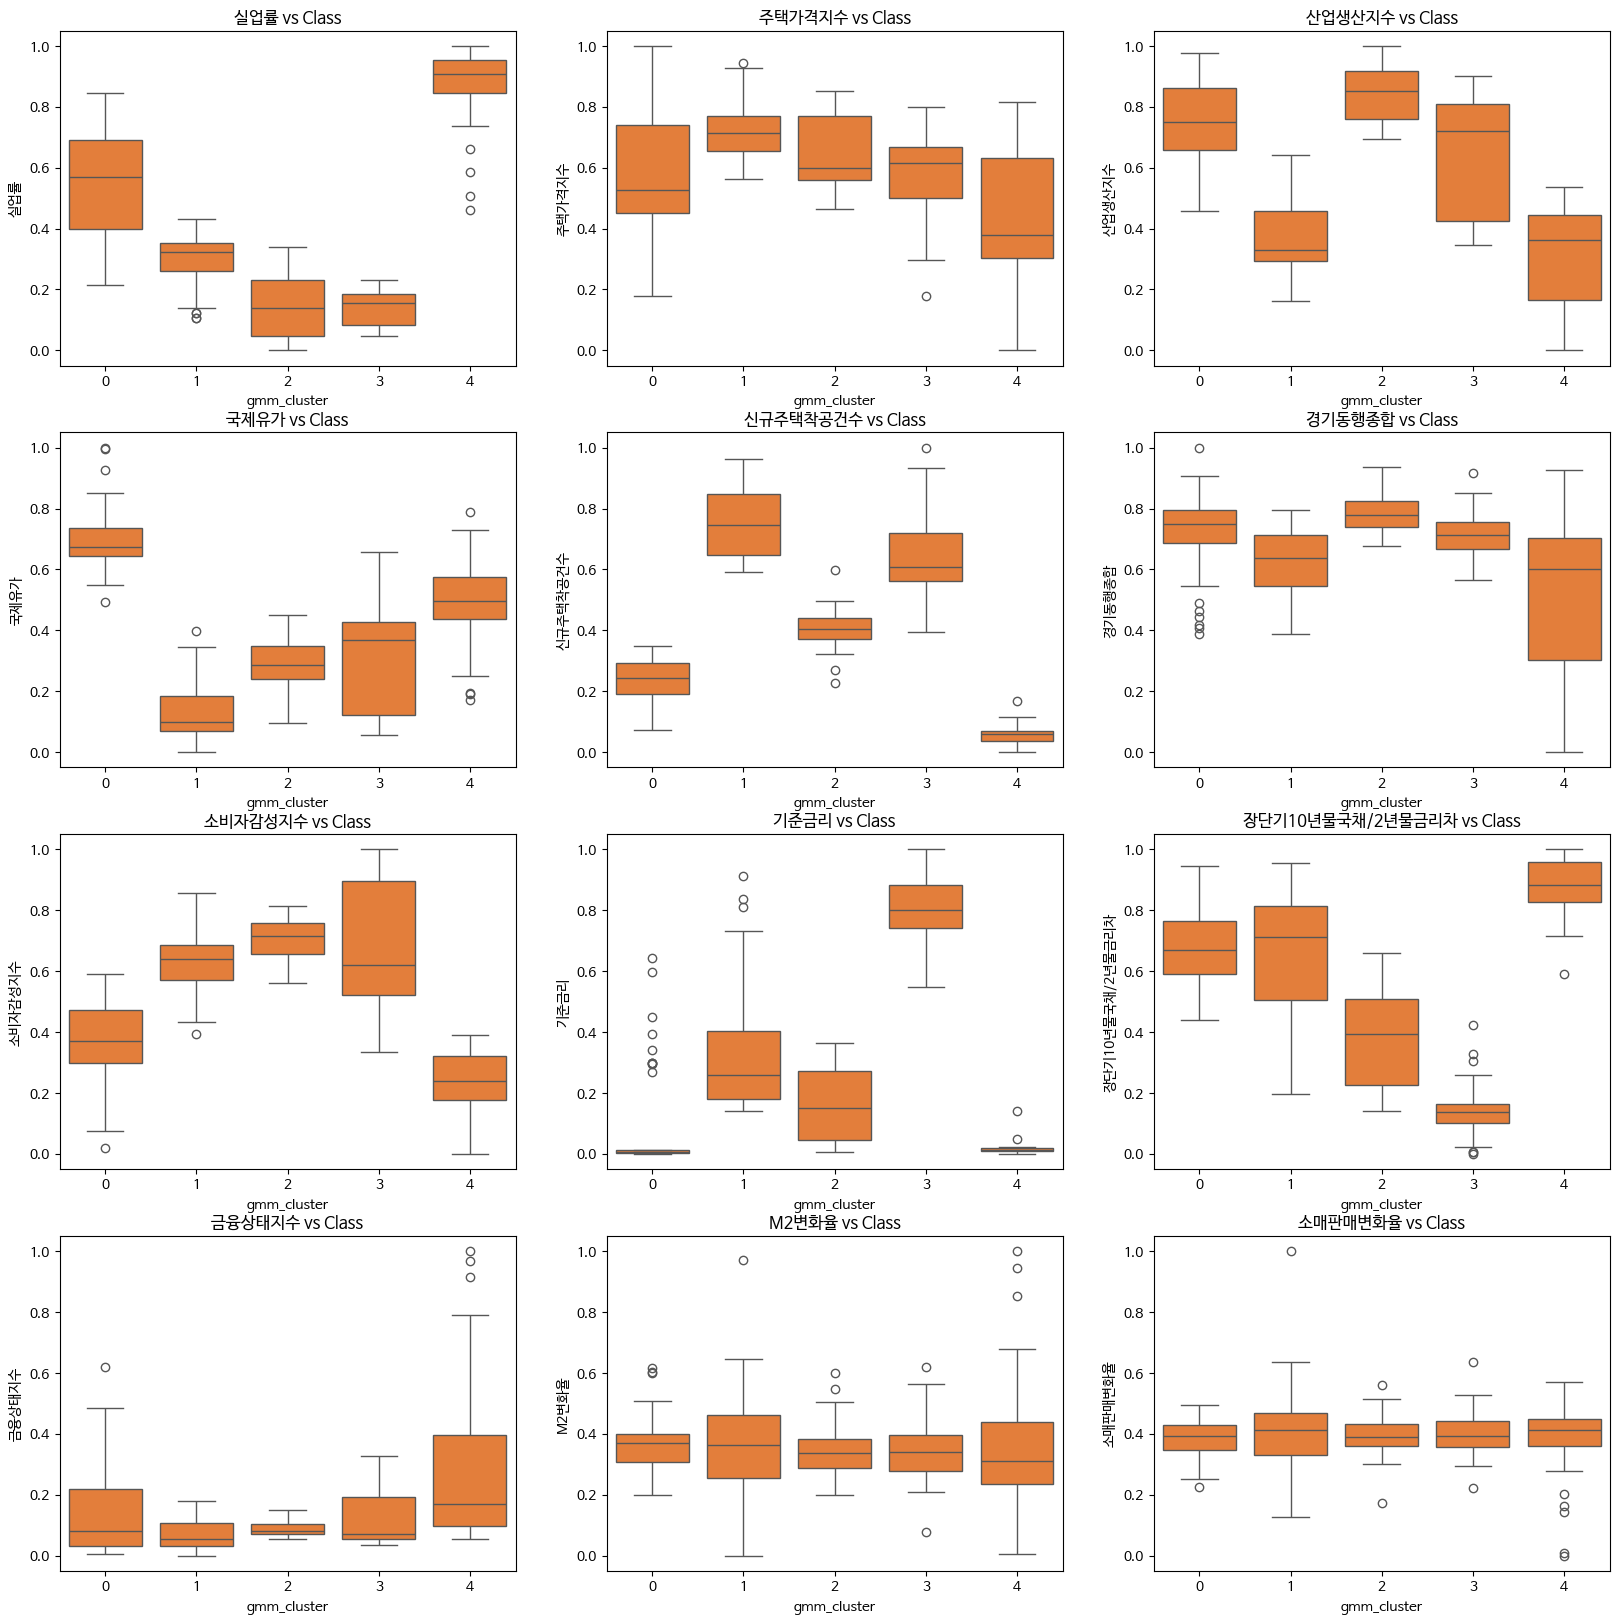

In [93]:
# 주성분 vs 변수들의 상자 수염 플롯 (스케일링 후 데이터와 비교)
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
#plt.rcParams['font.family'] ='Malgun Gothic'
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

sns.boxplot(x='gmm_cluster', y='실업률', data=pca_df0, color='#FF781F', ax=ax[0, 0])
ax[0, 0].set_title('실업률 vs Class')

sns.boxplot(x='gmm_cluster', y='주택가격지수', data=pca_df0, color='#FF781F', ax=ax[0, 1])
ax[0, 1].set_title('주택가격지수 vs Class')

sns.boxplot(x='gmm_cluster', y='산업생산지수', data=pca_df0, color='#FF781F', ax=ax[0, 2])
ax[0, 2].set_title('산업생산지수 vs Class')

sns.boxplot(x='gmm_cluster', y='국제유가', data=pca_df0, color='#FF781F', ax=ax[1, 0])
ax[1, 0].set_title('국제유가 vs Class')

sns.boxplot(x='gmm_cluster', y='신규주택착공건수', data=pca_df0, color='#FF781F', ax=ax[1, 1])
ax[1, 1].set_title('신규주택착공건수 vs Class')

sns.boxplot(x='gmm_cluster', y='경기동행종합', data=pca_df0, color='#FF781F', ax=ax[1, 2])
ax[1, 2].set_title('경기동행종합 vs Class')

sns.boxplot(x='gmm_cluster', y='소비자감성지수', data=pca_df0, color='#FF781F', ax=ax[2, 0])
ax[2, 0].set_title('소비자감성지수 vs Class')

sns.boxplot(x='gmm_cluster', y='기준금리', data=pca_df0, color='#FF781F', ax=ax[2, 1])
ax[2, 1].set_title('기준금리 vs Class')

sns.boxplot(x='gmm_cluster', y='장단기10년물국채/2년물금리차', data=pca_df0, color='#FF781F', ax=ax[2, 2])
ax[2, 2].set_title('장단기10년물국채/2년물금리차 vs Class')

sns.boxplot(x='gmm_cluster', y='금융상태지수', data=pca_df0, color='#FF781F', ax=ax[3, 0])
ax[3, 0].set_title('금융상태지수 vs Class')

sns.boxplot(x='gmm_cluster', y='M2변화율', data=pca_df0, color='#FF781F', ax=ax[3, 1])
ax[3, 1].set_title('M2변화율 vs Class')

sns.boxplot(x='gmm_cluster', y='소매판매변화율', data=pca_df0, color='#FF781F', ax=ax[3, 2])
ax[3, 2].set_title('소매판매변화율 vs Class')

plt.show()


#### 분류모델 돌려보기

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [235]:
# 데이터프레임 불러오기
economics_df = pd.read_csv('/content/drive/MyDrive/프로젝트1/dataset/resampled_data_final.csv',encoding="euc-kr")
economics_df['DATE'] = pd.to_datetime(economics_df['DATE'])
economics_df['DATE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 289 entries, 0 to 288
Series name: DATE
Non-Null Count  Dtype         
--------------  -----         
287 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.4 KB


In [236]:
# 상관계수로 제거
economics_df.drop(['장단기10년물국채/3개월금리차','신규실업수당청구','금융상태지수레버리지','제조업신규주문'],axis=1,inplace=True)

In [237]:
economics_df = economics_df.iloc[:287 , ]

In [238]:
economics_df.tail()

,DATE,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,M2통화량,경기동행종합,산업생산지수,소매판매
282,2023-07-31,-0.91,76.070,3.5,1451.0,310.146,-0.286,71.5,5.12,20863.7,138.67,103.1900,694415.0
283,2023-08-31,-0.76,81.386,3.8,1305.0,311.519,-0.340,69.4,5.33,20825.5,138.80,103.2411,699540.0
284,2023-09-30,-0.44,89.425,3.8,1356.0,312.417,-0.358,67.9,5.33,20755.3,139.21,103.3346,705304.0
285,2023-10-31,-0.19,85.640,3.8,1376.0,312.953,-0.336,63.8,5.33,20725.6,139.38,102.4592,703528.0
286,2023-11-30,-0.36,77.685,3.7,1525.0,312.953,-0.390,61.3,5.33,20767.4,139.81,102.4301,705981.0


In [239]:
# 주택가격지수. 제조업신규주문 , 경기동행종합지수는 차분하고 (변동치로 변경한다는 뜻)
# 제조업 신규주문은 앞으로 어떻게 처리할지 일단 보류
#M2와 소매판매는 변화율로 바꾸는 전처리 시행
economics_df.주택가격지수 = economics_df.주택가격지수.diff().fillna(method= 'bfill')
economics_df.경기동행종합 = economics_df.경기동행종합.diff().fillna(method= 'bfill')
economics_df['M2차분'] = economics_df.M2통화량.diff().fillna(method= 'bfill')
economics_df['M2변화율'] = economics_df.M2차분/ (economics_df.M2통화량.shift(1)) * 100
#economics_df['M2변화율'] .fillna(method = 'ffill')
economics_df['소매판매차분'] = economics_df.소매판매.diff().fillna(method='bfill')
economics_df['소매판매변화율'] = economics_df.소매판매차분/ (economics_df.소매판매.shift(1)) * 100

# 차분, 변화율 확인
economics_df[['M2통화량','M2차분','M2변화율','소매판매','소매판매차분','소매판매변화율']].head(10)
# 결측치를 다음날 데이터로 채워주기
economics_df['M2변화율'] = economics_df['M2변화율'].fillna(method = 'bfill')
economics_df['소매판매변화율'] = economics_df['소매판매변화율'].fillna(method = 'bfill')
# M2, 소매판매 원데이터를 지웠습니다.
economics_df.drop(['M2통화량','M2차분','소매판매','소매판매차분'],axis = 1,inplace = True)


In [240]:
past_data = economics_df.loc[economics_df['DATE'].dt.year <2020 ]
present_data = economics_df.loc[economics_df['DATE'].dt.year >=2020 ]

In [241]:
# 다시 날짜를 인덱스로 설정해주기
economics_df = economics_df.set_index('DATE')

In [242]:
past_data.head()

,DATE,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,경기동행종합,산업생산지수,M2변화율,소매판매변화율
0,2000-01-31,0.07,27.259,4.0,1636.0,0.571,-0.193,112.0,5.45,0.20,91.4251,0.282885,1.483339
1,2000-02-29,-0.11,29.366,4.1,1737.0,0.571,-0.204,111.3,5.73,0.20,91.7357,0.282885,1.483339
2,2000-03-31,-0.47,29.842,4.0,1604.0,0.895,-0.130,107.1,5.85,0.43,92.0933,0.658204,1.166091
3,2000-04-30,-0.45,25.722,3.8,1626.0,1.074,-0.044,109.2,6.02,0.34,92.6838,1.186786,-1.506584
4,2000-05-31,-0.40,28.788,4.0,1575.0,1.162,0.021,110.7,6.27,0.19,92.9376,-0.255974,0.128391


In [243]:
past_data.set_index('DATE', inplace=True)
past_data

,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,경기동행종합,산업생산지수,M2변화율,소매판매변화율
DATE,,,,,,,,,,,,
2000-01-31,0.07,27.259,4.0,1636.0,0.571,-0.193,112.0,5.45,0.20,91.4251,0.282885,1.483339
2000-02-29,-0.11,29.366,4.1,1737.0,0.571,-0.204,111.3,5.73,0.20,91.7357,0.282885,1.483339
2000-03-31,-0.47,29.842,4.0,1604.0,0.895,-0.130,107.1,5.85,0.43,92.0933,0.658204,1.166091
2000-04-30,-0.45,25.722,3.8,1626.0,1.074,-0.044,109.2,6.02,0.34,92.6838,1.186786,-1.506584
2000-05-31,-0.40,28.788,4.0,1575.0,1.162,0.021,110.7,6.27,0.19,92.9376,-0.255974,0.128391
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,0.00,54.806,3.6,1367.0,0.359,-0.538,89.8,2.13,0.24,102.7754,0.498632,0.669311
2019-09-30,0.05,56.947,3.5,1300.0,0.178,-0.505,93.2,2.04,0.39,102.5315,0.626902,-0.554691
2019-10-31,0.17,53.963,3.6,1332.0,0.093,-0.510,95.5,1.83,0.21,101.6022,0.884189,0.271944


In [244]:
# past_data 민멕스 스케일링
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 선언 및 Fitting
mMscaler = MinMaxScaler()
mMscaler.fit(past_data)

# 데이터 변환
past_scaled_data = mMscaler.transform(past_data)

# 데이터 프레임으로 저장
past_scaled_data = pd.DataFrame(data = past_scaled_data, index = past_data.index , columns = past_data.columns)

In [245]:
present_data.set_index('DATE',inplace=True)

In [246]:
# present_data 민멕스 스케일링
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 선언 및 Fitting
mMscaler = MinMaxScaler()
mMscaler.fit(present_data)

# 데이터 변환
present_scaled_data = mMscaler.transform(present_data)

# 데이터 프레임으로 저장
present_scaled_data = pd.DataFrame(data = present_scaled_data, index = present_data.index , columns = present_data.columns)

In [247]:
present_scaled_data.head()

,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,경기동행종합,산업생산지수,M2변화율,소매판매변화율
DATE,,,,,,,,,,,,
2020-01-31,0.469697,0.416842,0.017544,0.736902,0.320167,0.104607,0.976471,0.284091,0.905956,0.886347,0.208700,0.432413
2020-02-29,0.503788,0.345868,0.008772,0.728929,0.378661,0.205374,1.000000,0.289773,0.903448,0.899881,0.190037,0.436840
2020-03-31,0.579545,0.128804,0.087719,0.389522,0.481271,0.804223,0.766667,0.113636,0.824451,0.690387,0.602460,0.167302
2020-04-30,0.568182,0.000000,1.000000,0.000000,0.487396,1.000000,0.427451,0.000000,0.000000,0.000000,1.000000,0.000000
2020-05-31,0.587121,0.122242,0.859649,0.146925,0.416652,0.598848,0.437255,0.000000,0.997492,0.072650,0.817767,1.000000


In [248]:
past_scaled_data.head()

,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,경기동행종합,산업생산지수,M2변화율,소매판매변화율
DATE,,,,,,,,,,,,
2000-01-31,0.163142,0.068739,0.076923,0.645125,0.627085,0.175077,1.000000,0.831530,0.703704,0.346574,0.279060,0.506405
2000-02-29,0.108761,0.087142,0.092308,0.701393,0.627085,0.172010,0.987654,0.874807,0.703704,0.362563,0.279060,0.506405
2000-03-31,0.000000,0.091300,0.076923,0.627298,0.676664,0.192640,0.913580,0.893354,0.916667,0.380972,0.420244,0.476300
2000-04-30,0.006042,0.055314,0.046154,0.639554,0.704055,0.216616,0.950617,0.919629,0.833333,0.411371,0.619081,0.222681
2000-05-31,0.021148,0.082094,0.076923,0.611142,0.717521,0.234737,0.977072,0.958269,0.694444,0.424436,0.076356,0.377830


In [249]:
# past_scaled_data에 cluster 컬럼 추가
past_scaled_data.reset_index('DATE',inplace=True)
past_scaled_data['cluster'] = scaled_pca['gmm_cluster']
past_scaled_data

,DATE,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,경기동행종합,산업생산지수,M2변화율,소매판매변화율,cluster
0,2000-01-31,0.163142,0.068739,0.076923,0.645125,0.627085,0.175077,1.000000,0.831530,0.703704,0.346574,0.279060,0.506405,3
1,2000-02-29,0.108761,0.087142,0.092308,0.701393,0.627085,0.172010,0.987654,0.874807,0.703704,0.362563,0.279060,0.506405,3
2,2000-03-31,0.000000,0.091300,0.076923,0.627298,0.676664,0.192640,0.913580,0.893354,0.916667,0.380972,0.420244,0.476300,3
3,2000-04-30,0.006042,0.055314,0.046154,0.639554,0.704055,0.216616,0.950617,0.919629,0.833333,0.411371,0.619081,0.222681,3
4,2000-05-31,0.021148,0.082094,0.076923,0.611142,0.717521,0.234737,0.977072,0.958269,0.694444,0.424436,0.076356,0.377830,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2019-08-31,0.141994,0.309343,0.015385,0.495265,0.594644,0.078896,0.608466,0.318393,0.740741,0.930879,0.360217,0.429159,2
236,2019-09-30,0.157100,0.328043,0.000000,0.457939,0.566947,0.088096,0.668430,0.304482,0.879630,0.918323,0.408469,0.313010,2
237,2019-10-31,0.193353,0.301980,0.015385,0.475766,0.553940,0.086702,0.708995,0.272025,0.712963,0.870483,0.505253,0.391452,2
238,2019-11-30,0.193353,0.328934,0.015385,0.483565,0.560826,0.073599,0.731922,0.228748,0.759259,0.898581,0.424573,0.434743,2


In [ ]:
#past_scaled_data.set_index('DATE', inplace=True)

In [252]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# 의사 결정 트리 모델 생성
model = DecisionTreeClassifier(random_state=42)

# past_scaled_data의 features, label 분리
X_past = past_scaled_data.drop(labels='cluster', axis=1)
y_past = past_scaled_data['cluster']

# 탐색할 하이퍼파라미터 공간 정의
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# 랜덤 서치 객체 생성
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)

# 모델을 데이터에 fitting
random_search.fit(X_past, y_past)

# 최적의 하이퍼파라미터와 점수 출력
print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)

# 최적의 하이퍼파라미터를 사용하여 모델 재생성
best_model = DecisionTreeClassifier(**random_search.best_params_)

# 과거 데이터(2000~2019) 학습
best_model.fit(X_past, y_past)

# 미래 데이터 (2020~2023)
X_present = present_scaled_data

# 미래 데이터 (2020~2023)에 대한 예측
y_predict_present = best_model.predict(X_present)

# 2020~2023 국면 예측 결과 출력
y_predict_present

Best parameters found:  {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 9, 'criterion': 'gini'}
Best score found:  0.8125


array([2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3])

In [253]:
# 모델의 성능을 평가하기 위해 교차 검증을 수행
from sklearn.model_selection import cross_val_score, KFold

# k-fold 교차 검증을 위한 객체 생성
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 모델 생성 (최적의 하이퍼파라미터를 사용)
best_model = DecisionTreeClassifier(**random_search.best_params_)

# k-fold 교차 검증을 통한 모델 성능 측정
cv_scores = cross_val_score(best_model, X_past, y_past, cv=kfold)

# 각 폴드에서의 성능 출력
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score}")

# 평균 성능 출력
"Mean CV score:", np.mean(cv_scores)

Fold 1: 0.9583333333333334
Fold 2: 0.8541666666666666
Fold 3: 0.8958333333333334
Fold 4: 0.9583333333333334
Fold 5: 0.9166666666666666


('Mean CV score:', 0.9166666666666667)

In [254]:
# present_data에 예측한 cluster 레이블 추가
present_data.reset_index('DATE',inplace=True)
present_data['cluster_dt'] = y_predict_present
present_data

,DATE,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,경기동행종합,산업생산지수,M2변화율,소매판매변화율,cluster_dt
0,2020-01-31,0.18,57.519,3.6,1572.0,0.161,-0.589,99.8,1.55,0.41,101.3768,0.491492,-0.078796,2
1,2020-02-29,0.27,50.543,3.5,1565.0,0.820,-0.484,101.0,1.58,0.37,101.6330,0.352689,0.070096,2
2,2020-03-31,0.47,29.208,4.4,1267.0,1.976,0.140,89.1,0.65,-0.89,97.6672,3.419998,-8.995753,2
3,2020-04-30,0.44,16.548,14.8,925.0,2.045,0.344,71.8,0.05,-14.04,84.5979,6.376614,-14.622913,4
4,2020-05-31,0.49,28.563,13.2,1054.0,1.248,-0.074,72.3,0.05,1.87,85.9732,5.021297,19.011874,2
5,2020-06-30,0.50,38.307,11.0,1266.0,1.327,-0.334,78.1,0.08,1.91,91.5625,1.571892,8.577351,2
6,2020-07-31,0.44,40.710,10.2,1529.0,1.758,-0.433,72.5,0.09,0.29,95.0144,0.852650,1.589697,2
7,2020-08-31,0.58,42.339,8.4,1377.0,2.481,-0.505,74.1,0.10,1.47,95.8881,0.326474,0.998238,2
8,2020-09-30,0.56,39.634,7.8,1463.0,2.753,-0.497,80.4,0.09,0.75,95.8444,1.260765,1.991341,2
9,2020-10-31,0.74,39.396,6.8,1537.0,3.012,-0.484,81.8,0.09,0.98,96.4292,0.817126,-0.399478,2


In [156]:
present_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              47 non-null     datetime64[ns]
 1   장단기10년물국채/2년물금리차  47 non-null     float64       
 2   국제유가              47 non-null     float64       
 3   실업률               47 non-null     float64       
 4   신규주택착공건수          47 non-null     float64       
 5   주택가격지수            47 non-null     float64       
 6   금융상태지수            47 non-null     float64       
 7   소비자감성지수           47 non-null     float64       
 8   기준금리              47 non-null     float64       
 9   경기동행종합            47 non-null     float64       
 10  산업생산지수            47 non-null     float64       
 11  M2변화율             47 non-null     float64       
 12  소매판매변화율           47 non-null     float64       
 13  cluster           47 non-null     int64         
 14  cluster2          47 non-nul

In [255]:
present_data.set_index('DATE',inplace=True)
present_data.head()

,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,경기동행종합,산업생산지수,M2변화율,소매판매변화율,cluster_dt
DATE,,,,,,,,,,,,,
2020-01-31,0.18,57.519,3.6,1572.0,0.161,-0.589,99.8,1.55,0.41,101.3768,0.491492,-0.078796,2
2020-02-29,0.27,50.543,3.5,1565.0,0.820,-0.484,101.0,1.58,0.37,101.6330,0.352689,0.070096,2
2020-03-31,0.47,29.208,4.4,1267.0,1.976,0.140,89.1,0.65,-0.89,97.6672,3.419998,-8.995753,2
2020-04-30,0.44,16.548,14.8,925.0,2.045,0.344,71.8,0.05,-14.04,84.5979,6.376614,-14.622913,4
2020-05-31,0.49,28.563,13.2,1054.0,1.248,-0.074,72.3,0.05,1.87,85.9732,5.021297,19.011874,2


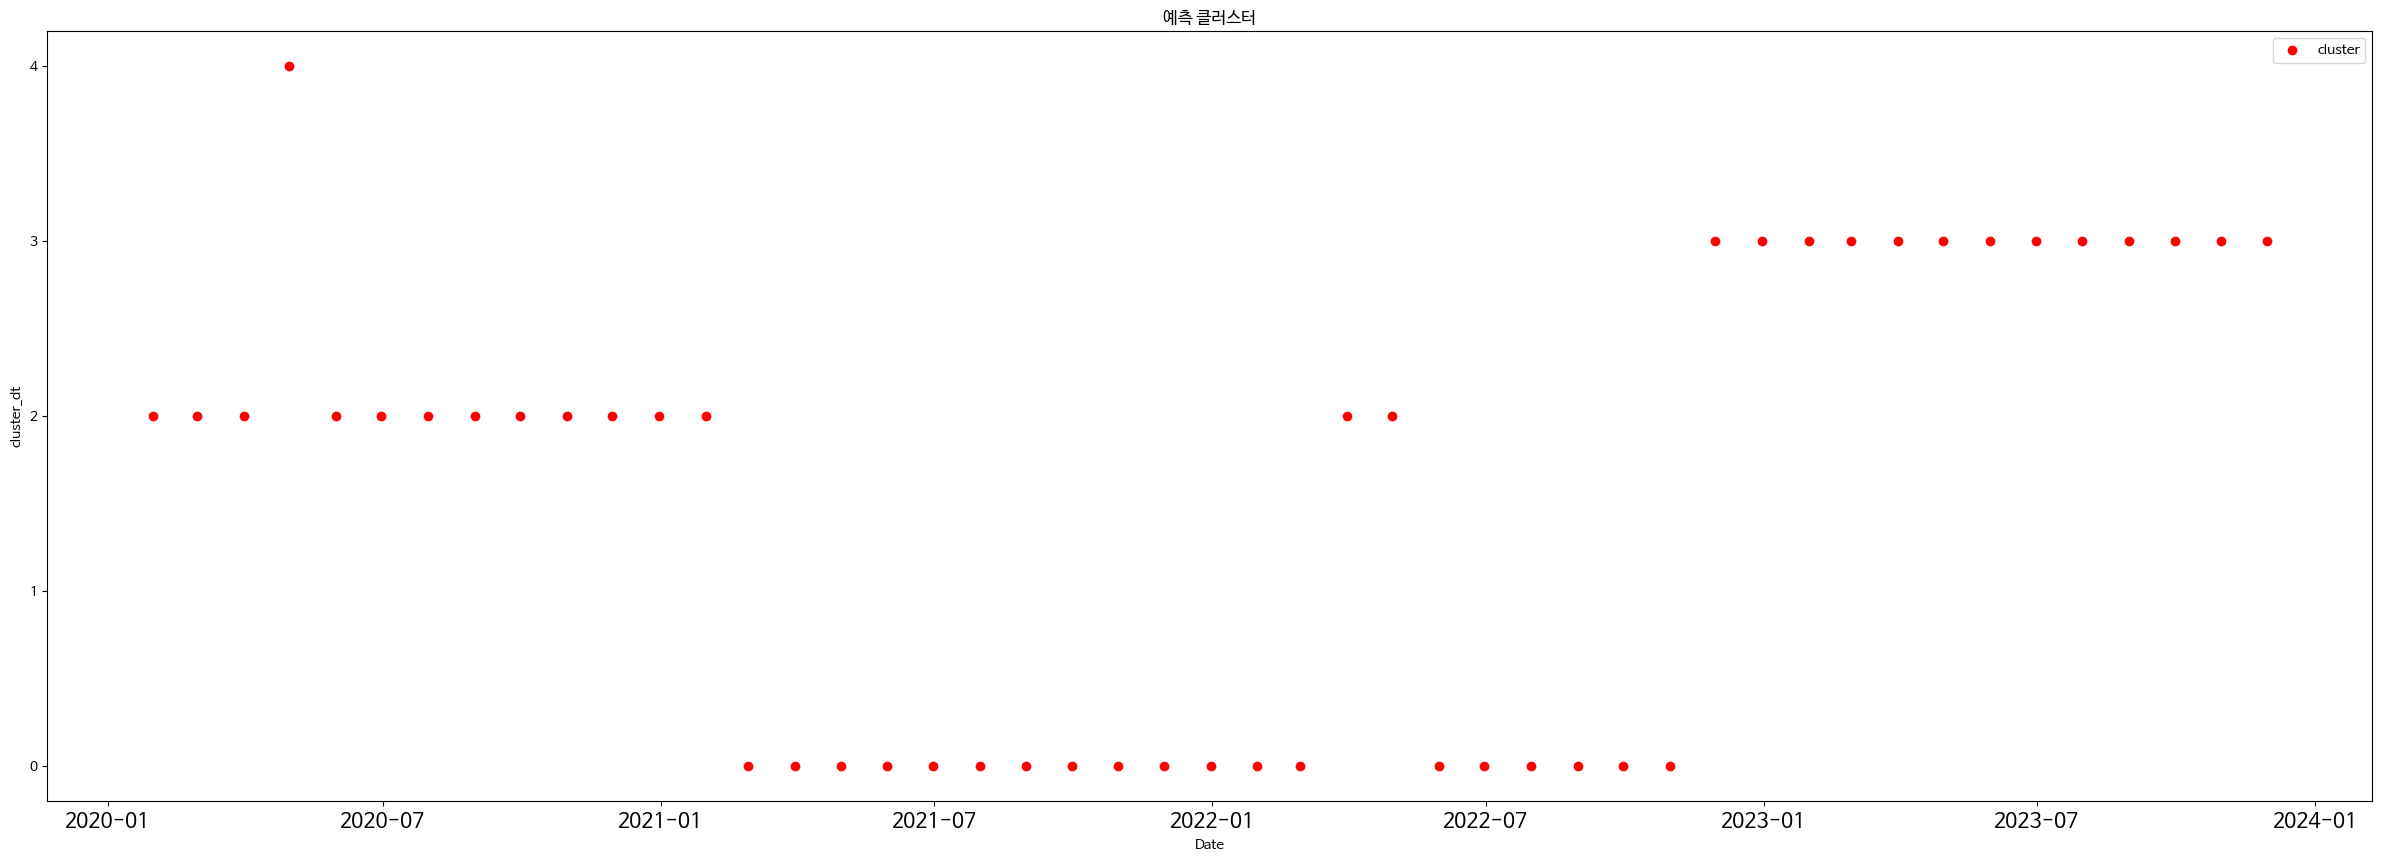

In [256]:
# 예측 클러스터 시각화
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(30, 10))
plt.scatter(present_data.index, present_data['cluster_dt'], label='cluster', color='red')

plt.title('예측 클러스터')
plt.xlabel('Date')
plt.ylabel('cluster_dt')
plt.xticks(fontsize=15)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))  # y 축에 정수값 표시
plt.legend()
plt.show()


In [257]:
cluster_2020_2023 = present_data[['cluster_dt']]

In [ ]:
# cluster_2020_2023.to_csv('예측국면.csv')

In [258]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# 랜덤 포레스트 모델 생성
model2 = RandomForestClassifier(random_state = 42)

# past_scaled_data의 features, label 분리
X_past = past_scaled_data.drop(labels='cluster', axis=1)
y_past = past_scaled_data['cluster']

# 탐색할 하이퍼파라미터 공간 정의
param_grid = {
    'n_estimators': [100, 200, 300],  # 결정 트리 개수
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# 랜덤 서치 객체 생성
random_search2 = RandomizedSearchCV(model2, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)

# 모델을 데이터에 fitting
random_search2.fit(X_past, y_past)

# 최적의 하이퍼파라미터와 그때의 점수 출력
print("Best parameters found: ", random_search2.best_params_)
print("Best score found: ", random_search2.best_score_)

# 최적의 하이퍼파라미터를 사용하여 모델 재생성
best_model2 = RandomForestClassifier(**random_search2.best_params_)

# 과거 데이터(2000~2019) 학습
best_model2.fit(X_past, y_past)

# 현재 데이터 (2000~2023)
X_present = present_scaled_data

# 현재 데이터 (2000~2023)에 대한 예측
y_predict_present2 = best_model2.predict(X_present)

# 2020~2023 국면 예측 결과 출력
y_predict_present2

Best parameters found:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'entropy'}
Best score found:  0.8416666666666666


array([2, 2, 2, 4, 4, 4, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3])

In [219]:
# 모델의 성능을 평가하기 위해 교차 검증을 수행
from sklearn.model_selection import cross_val_score, KFold

# k-fold 교차 검증을 위한 객체 생성
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 모델 생성 (최적의 하이퍼파라미터를 사용)
best_model2 = RandomForestClassifier(**random_search2.best_params_)

# k-fold 교차 검증을 통한 모델 성능 측정
cv_scores = cross_val_score(best_model2, X_past, y_past, cv=kfold)

# 각 폴드에서의 성능 출력
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score}")

# 평균 성능 출력
"Mean CV score:", np.mean(cv_scores)

Fold 1: 1.0
Fold 2: 0.9791666666666666
Fold 3: 0.9583333333333334
Fold 4: 1.0
Fold 5: 1.0


('Mean CV score:', 0.9875)

In [259]:
# present_data에 예측한 cluster 레이블 추가
# 랜덤 포레스트가 K-FOLD값이 더 높으므로 예측 분류모델로 선정
present_data.reset_index('DATE',inplace=True)
present_data['cluster'] = y_predict_present2
present_data.head(3)

,DATE,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,경기동행종합,산업생산지수,M2변화율,소매판매변화율,cluster_dt,cluster
0,2020-01-31,0.18,57.519,3.6,1572.0,0.161,-0.589,99.8,1.55,0.41,101.3768,0.491492,-0.078796,2,2
1,2020-02-29,0.27,50.543,3.5,1565.0,0.820,-0.484,101.0,1.58,0.37,101.6330,0.352689,0.070096,2,2
2,2020-03-31,0.47,29.208,4.4,1267.0,1.976,0.140,89.1,0.65,-0.89,97.6672,3.419998,-8.995753,2,2


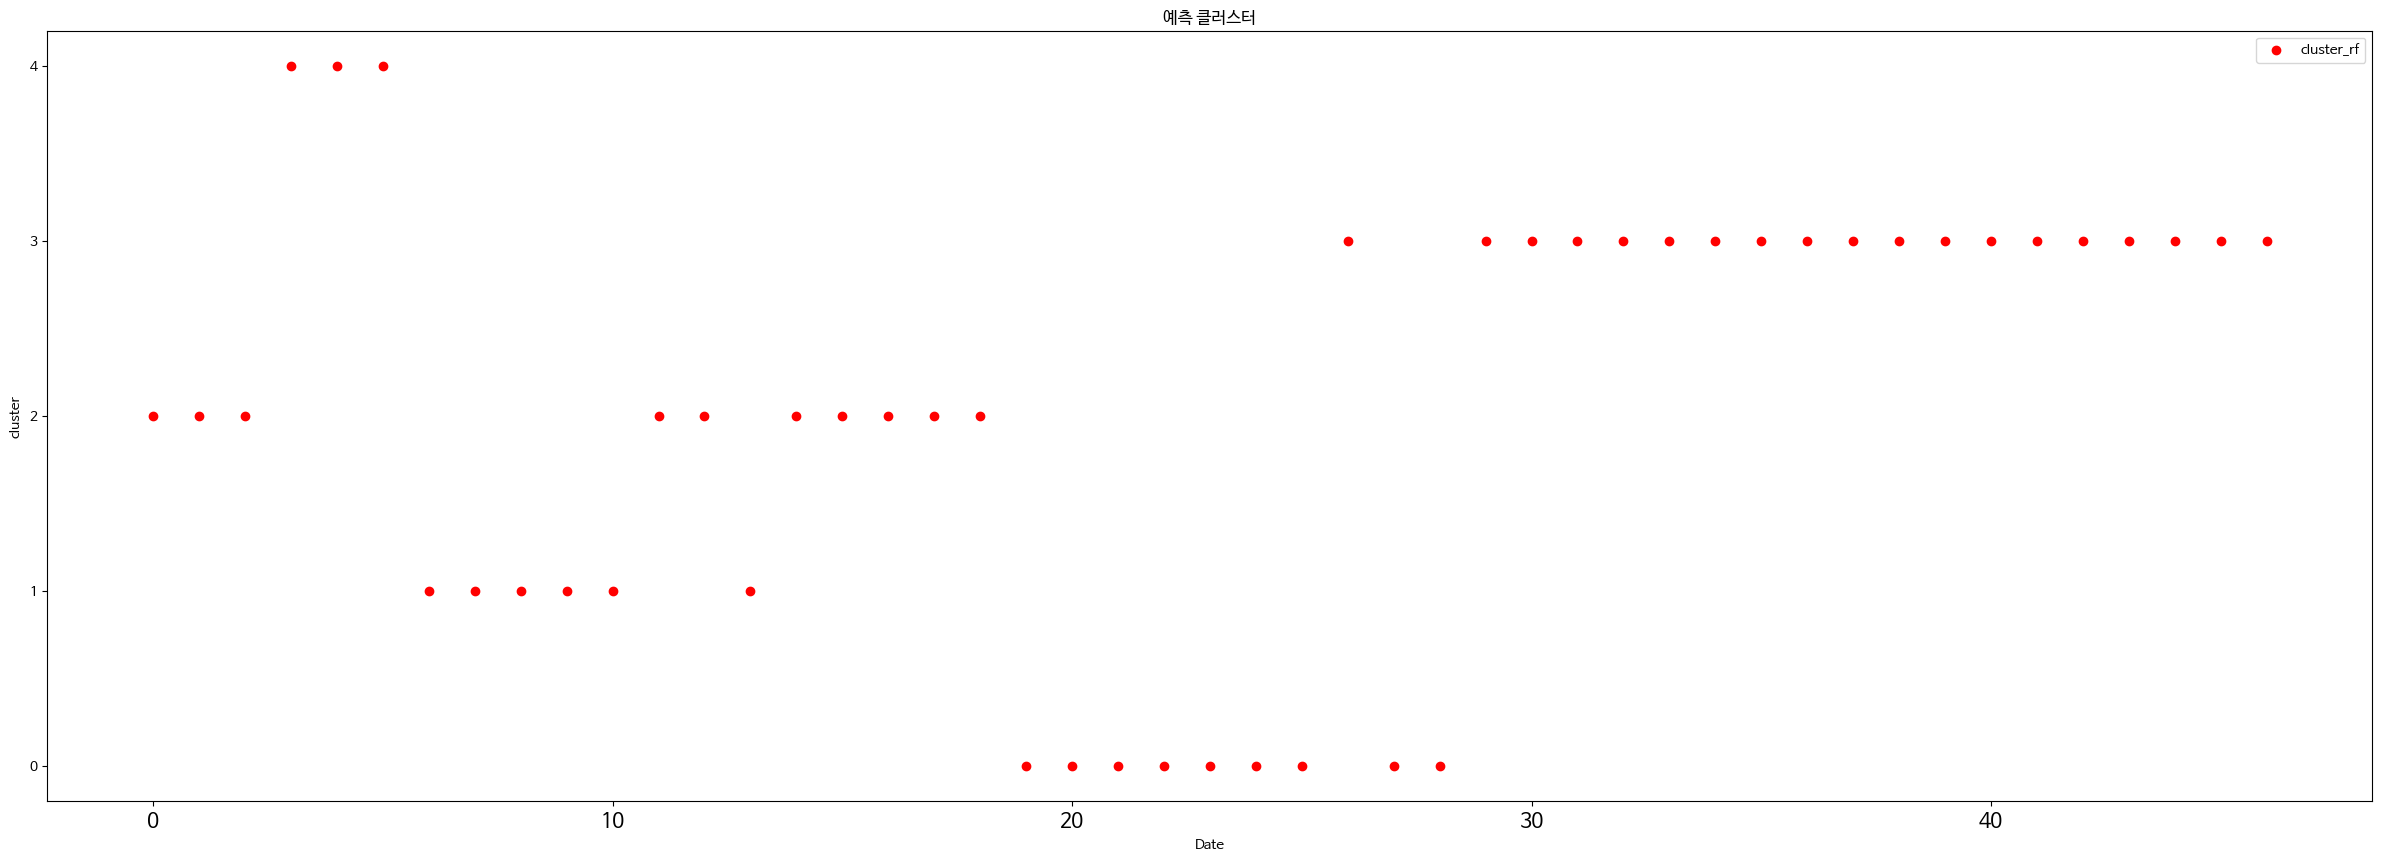

In [260]:
# 예측 클러스터 시각화
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(30, 10))

plt.scatter(present_data.index, present_data['cluster'], label='cluster_rf', color='red')

plt.title('예측 클러스터')
plt.xlabel('Date')
plt.ylabel('cluster')
plt.xticks(fontsize=15)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))  # y 축에 정수값 표시
plt.legend()
plt.show()


### ANOVA

In [222]:
past_scaled_data.head()

,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,경기동행종합,산업생산지수,M2변화율,소매판매변화율,cluster
DATE,,,,,,,,,,,,,
2000-01-31,0.163142,0.068739,0.076923,0.645125,0.627085,0.175077,1.000000,0.831530,0.703704,0.346574,0.279060,0.506405,3
2000-02-29,0.108761,0.087142,0.092308,0.701393,0.627085,0.172010,0.987654,0.874807,0.703704,0.362563,0.279060,0.506405,3
2000-03-31,0.000000,0.091300,0.076923,0.627298,0.676664,0.192640,0.913580,0.893354,0.916667,0.380972,0.420244,0.476300,3
2000-04-30,0.006042,0.055314,0.046154,0.639554,0.704055,0.216616,0.950617,0.919629,0.833333,0.411371,0.619081,0.222681,3
2000-05-31,0.021148,0.082094,0.076923,0.611142,0.717521,0.234737,0.977072,0.958269,0.694444,0.424436,0.076356,0.377830,3


In [261]:
# 정규성 검정 (Shapiro-Wilk)
# 귀무가설 : 정규분포를 따른다
from scipy.stats import shapiro

# 클러스터별 feature에 대해 정규성 검정 수행
for cluster_num in range(4):  # 클러스터 번호는 0부터 3까지 총 4개
    cluster_data = past_scaled_data[past_scaled_data['cluster'] == cluster_num]

    print(f"\nCluster {cluster_num} - Shapiro-Wilk Test:")
    for column in cluster_data.columns:
        shapiro_test = shapiro(cluster_data[column])
        if shapiro_test.pvalue >= 0.05:
            print(f"{column} - p-value: {shapiro_test.pvalue}")


Cluster 0 - Shapiro-Wilk Test:
장단기10년물국채/2년물금리차 - p-value: 0.199868306517601
신규주택착공건수 - p-value: 0.05534381419420242
주택가격지수 - p-value: 0.11900793761014938
산업생산지수 - p-value: 0.4279070496559143
소매판매변화율 - p-value: 0.1663435399532318
cluster - p-value: 1.0

Cluster 1 - Shapiro-Wilk Test:
주택가격지수 - p-value: 0.05864374339580536
소비자감성지수 - p-value: 0.12842749059200287
M2변화율 - p-value: 0.060810476541519165
cluster - p-value: 1.0

Cluster 2 - Shapiro-Wilk Test:
국제유가 - p-value: 0.5230830907821655
신규주택착공건수 - p-value: 0.079179547727108
경기동행종합 - p-value: 0.12204970419406891
M2변화율 - p-value: 0.10355553776025772
소매판매변화율 - p-value: 0.14412900805473328
cluster - p-value: 1.0

Cluster 3 - Shapiro-Wilk Test:
경기동행종합 - p-value: 0.7533013820648193
M2변화율 - p-value: 0.1310555785894394
소매판매변화율 - p-value: 0.20798666775226593
cluster - p-value: 1.0


In [262]:
df2 = past_scaled_data[['경기동행종합', '국제유가','신규주택착공건수', 'M2변화율','소매판매변화율','주택가격지수','소비자감성지수','산업생산지수','장단기10년물국채/2년물금리차','cluster']]

In [263]:
cluster0 = df2[df2['cluster']==0]
cluster1 = df2[df2['cluster']==1]
cluster2 = df2[df2['cluster']==2]
cluster3 = df2[df2['cluster']==3]

cluster4 = df2[df2['cluster']==4]

In [264]:
# 등분산성 검정 - 바틀렛검정
# 귀무가설 : 등분산성의 특징이 있다
from scipy.stats import bartlett

# 등분산성 검정을 수행할 데이터프레임들
dataframes = [cluster0, cluster1, cluster2, cluster3,cluster4]

# 각 데이터프레임에 대해 등분산성 검정 수행
for i, cluster_data in enumerate(dataframes):
    print(f"\nCluster {i} - Bartlett's Test:")
    for column in cluster_data.columns:
        # 등분산성 검정 수행
        bartlett_test = bartlett(*[dataframe[column] for dataframe in dataframes])
        if bartlett_test.pvalue >= 0.05:
            print(f"{column} - p-value: {bartlett_test.pvalue}")


Cluster 0 - Bartlett's Test:

Cluster 1 - Bartlett's Test:

Cluster 2 - Bartlett's Test:

Cluster 3 - Bartlett's Test:

Cluster 4 - Bartlett's Test:


In [265]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from statsmodels.formula.api import ols

for col in cluster0.columns:
    F, p = stats.f_oneway(cluster0[col],
                    cluster1[col],
                    cluster2[col],
                    cluster3[col],
                    cluster4[col]
                    )
    # print(col)
    # print( 'F-Ratio: {}'.format(F)
    # , 'p-value:{}'.format(p)
    #  , sep = '\n')
    if p <= 0.05:
        # print(f"{col} \n F-Ratio: {F} \n p-value: {p}")
        print(f"{col} \n p-value: {p}")

경기동행종합 
 p-value: 7.836499674810164e-20
국제유가 
 p-value: 1.5112867296578342e-68
신규주택착공건수 
 p-value: 7.118534023493971e-107
주택가격지수 
 p-value: 1.6463541541239686e-12
소비자감성지수 
 p-value: 2.385329249219475e-57
산업생산지수 
 p-value: 1.223312240014958e-61
장단기10년물국채/2년물금리차 
 p-value: 7.896225847979245e-66
cluster 
 p-value: 0.0


In [ ]:
# 경기동행종합 국제유가 신규주택착공건수 소매판매변화율 주택가격지수 소비자감성지수 산업생산지수 장단기10년물국채/2년물금리차
# 위의 피처들이 각 국면 구별하는데 중요한 역할을 하는 피처

### interest rate 비교한 그래프

In [266]:
int= pd.read_csv('/content/drive/MyDrive/프로젝트1/dataset/FederalFundsEffectiveRate.csv')
int

,DATE,DFF
0,2000-01-01,5.448387
1,2000-02-01,5.734828
2,2000-03-01,5.853548
3,2000-04-01,6.019667
4,2000-05-01,6.268065
...,...,...
235,2019-08-01,2.125806
236,2019-09-01,2.043000
237,2019-10-01,1.829677
238,2019-11-01,1.553333


In [267]:
df2.reset_index(inplace=True)

In [268]:
int['cluster'] = df2['cluster']

In [269]:
int.set_index('DATE', inplace=True)
int.head()

,DFF,cluster
DATE,,
2000-01-01,5.448387,3
2000-02-01,5.734828,3
2000-03-01,5.853548,3
2000-04-01,6.019667,3
2000-05-01,6.268065,3


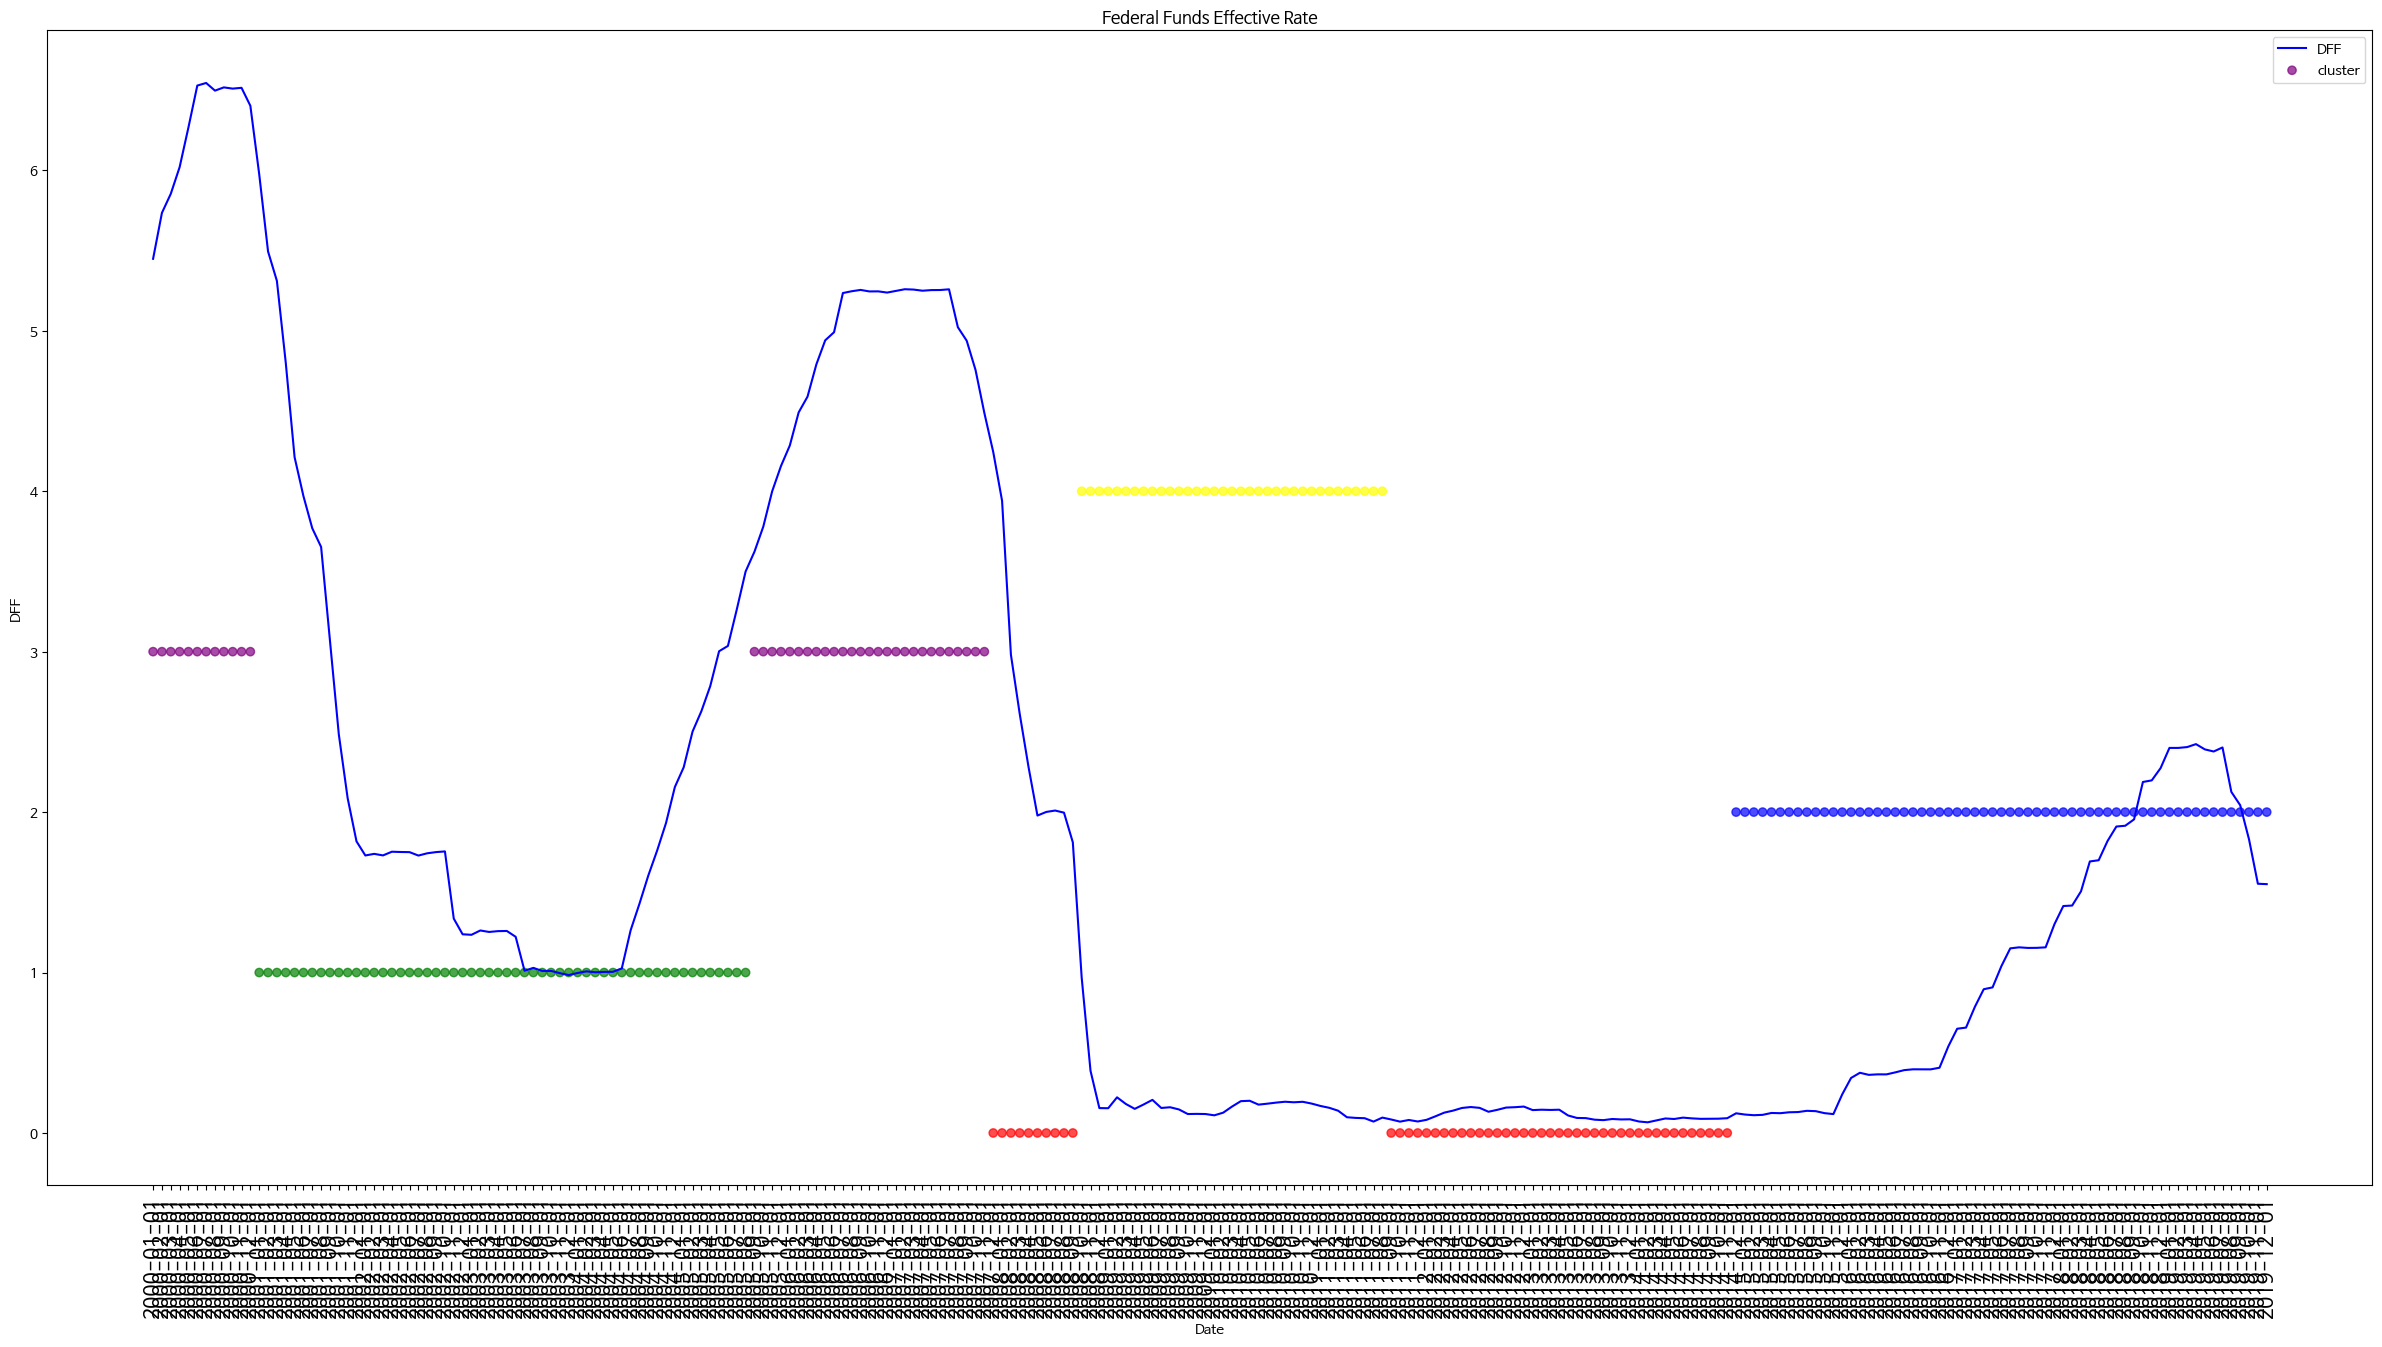

In [270]:
# interst rate와 경기 국면 클러스터 비교
import seaborn as sns

# 각 클러스터에 대한 색상을 정의
cluster_colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'purple', 4: 'yellow'}  # 클러스터의 수에 따라 조정

# 각 데이터 포인트에 대한 색상을 설정
colors = [cluster_colors[cluster] for cluster in gdp['cluster']]

# 그래프 그리기
plt.figure(figsize=(30, 15))

plt.plot(int.index, int['DFF'], label='DFF', color='blue')
plt.scatter(int.index, int['cluster'], c=colors, label='cluster', alpha=0.7)

plt.title('Federal Funds Effective Rate')
plt.xlabel('Date')
plt.ylabel('DFF')
plt.xticks(rotation='vertical', fontsize=15)
plt.legend()
plt.show()